In [1]:
import os
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import pandas as pd
from scipy.stats import linregress
from tabulate import tabulate
import matplotlib.colors as mcolors

# change the directory to the folder that includes all the ARGO datasets
dir_cp_argo = r'C:\Users\xliu38\OneDrive - University of Tasmania\Honours Research Project\Matlab code for Meander analysis\CP_argo_data'
os.chdir(dir_cp_argo)

In [2]:
# Open the new ARGO salinity and temperature files
arg_20 = xr.open_dataset('RG_temperature_salinity_clim_updated_2020.nc')

In [3]:
# Check the content of this argo .nc file
arg_20

<xarray.Dataset>
Dimensions:                        (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58, TIME: 192, month: 12)
Coordinates:
  * LONGITUDE                      (LONGITUDE) float32 20.5 21.5 ... 378.5 379.5
  * LATITUDE                       (LATITUDE) float32 -64.5 -63.5 ... 78.5 79.5
  * PRESSURE                       (PRESSURE) float32 2.5 10.0 ... 1.975e+03
  * TIME                           (TIME) datetime64[ns] 2004-01-15 ... 2019-...
  * month                          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    TEMPERATURE                    (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    TEMPERATURE_MONTHLY_CLIM       (month, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    TEMPERATURE_MONTHLY_ANOMALIES  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    SALINITY                       (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    SALINITY_MONTHLY_CLIM          (month, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    SALINITY_MONTHLY_ANOMALIES     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [4]:
arg_20.TIME[-1]

<xarray.DataArray 'TIME' ()>
array('2019-12-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    TIME     datetime64[ns] 2019-12-15

In [5]:
# Specify the variable in this file

# longitude, latitiude, depth, time and month
arg_20_lon = arg_20.LONGITUDE
arg_20_lat = arg_20.LATITUDE
arg_20_dep = arg_20.PRESSURE
arg_20_time = arg_20.TIME
arg_20_mon = arg_20.month

# temperature variables
arg_20_temp = arg_20.TEMPERATURE
arg_20_temp_mon_clm = arg_20.TEMPERATURE_MONTHLY_CLIM
arg_20_temp_mon_anm = arg_20.TEMPERATURE_MONTHLY_ANOMALIES

# salinity variables
arg_20_sal = arg_20.SALINITY
arg_20_sal_mon_clm = arg_20.SALINITY_MONTHLY_CLIM
arg_20_sal_mon_anm = arg_20.SALINITY_MONTHLY_ANOMALIES

In [6]:
# Set the longitude and latitude ranges of the Campbell Plateau region
lat_cp = [-57, -46]

# Set the longitude ranges of different sections of the Campbell Plateau region
lon_wh = [150, 210]
lon_up = [150, 158.4]
lon_pl = [158.4, 184.4]
lon_dw = [184.4, 210]
lon_fl = [191.6, 204.9]

In [7]:
# Specify the temperature and salinity variables within the Campbell Plateau region

# longitude
arg_20_lon_wh = arg_20_lon.where(
    np.logical_and(
        (arg_20_lon >= lon_wh[0]),
        (arg_20_lon <= lon_wh[1])
    ),
    drop=True
)

# latitude
arg_20_lat_wh = arg_20_lat.where(
    np.logical_and(
        (arg_20_lat >= lat_cp[0]),
        (arg_20_lat <= lat_cp[1])
    ),
    drop=True
)

# time from 2006 to 2019
arg_20_time_06_19 = arg_20_time.where(
    np.logical_and(
        (arg_20_time >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_time <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ),
    drop=True
)

In [8]:
arg_20_temp

<xarray.DataArray 'TEMPERATURE' (TIME: 192, PRESSURE: 58, LATITUDE: 145, LONGITUDE: 360)>
[581299200 values with dtype=float32]
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2004-01-15 2004-02-15 ... 2019-12-15

In [9]:
# temperature

arg_20_temp_wh_lon_lat_06_19 = arg_20_temp.where(
    np.logical_and(
        (arg_20_temp.LONGITUDE >= lon_wh[0]),
        (arg_20_temp.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp.LATITUDE >= lat_cp[0]),
        (arg_20_temp.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [10]:
arg_20_temp_wh_lon_lat_06_19

<xarray.DataArray 'TEMPERATURE' (TIME: 168, PRESSURE: 58, LATITUDE: 11, LONGITUDE: 60)>
array([[[[ 4.826    ,  5.085    ,  5.0880003, ...,  4.144    ,
           3.931    ,  3.6870003],
         [ 5.92     ,  5.874    ,  5.697    , ...,  5.401    ,
           5.1809998,  4.675    ],
         [ 6.8409996,  6.547    ,  6.454    , ...,  6.09     ,
           6.072    ,  6.0010004],
         ...,
         [11.493    , 11.326    , 11.509    , ..., 11.188001 ,
          11.262    , 11.288    ],
         [12.233    , 12.33     , 12.297999 , ..., 11.8359995,
          11.771    , 11.757    ],
         [13.065    , 13.077    , 12.982    , ..., 12.375999 ,
          12.307    , 12.24     ]],

        [[ 4.817    ,  5.0769997,  5.072    , ...,  4.128    ,
           3.907    ,  3.658    ],
         [ 5.91     ,  5.863    ,  5.684    , ...,  5.399    ,
           5.164    ,  4.651    ],
         [ 6.8399997,  6.5439997,  6.4469995, ...,  6.075    ,
           6.03     ,  5.9589996],
...
         [ 2.513    ,  2.502    ,  2.514    , ...,  2.636    ,
           2.629    ,  2.6139998],
         [ 2.541    ,  2.5419998,  2.53     , ...,  2.6430001,
           2.6360002,  2.6230001],
         [ 2.582    ,  2.6      ,  2.5749998, ...,  2.612    ,
           2.5990002,  2.589    ]],

        [[ 1.272    ,  1.331    ,  1.393    , ...,  1.5040001,
           1.4289999,  1.342    ],
         [ 1.6079999,  1.653    ,  1.694    , ...,  1.731    ,
           1.672    ,  1.61     ],
         [ 1.962    ,  1.955    ,  1.959    , ...,  1.91     ,
           1.889    ,  1.8709999],
         ...,
         [ 2.4659998,  2.4580002,  2.466    , ...,  2.564    ,
           2.555    ,  2.547    ],
         [ 2.478    ,  2.473    ,  2.466    , ...,  2.568    ,
           2.561    ,  2.554    ],
         [ 2.511    ,  2.522    ,  2.502    , ...,  2.5379999,
           2.526    ,  2.514    ]]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 150.5 151.5 152.5 153.5 ... 207.5 208.5 209.5
  * LATITUDE   (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2006-01-15 2006-02-15 ... 2019-12-15

In [11]:
# Continue for other variables

# salinity
arg_20_sal_wh_lon_lat_06_19 = arg_20_sal.where(
    np.logical_and(
        (arg_20_sal.LONGITUDE >= lon_wh[0]),
        (arg_20_sal.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal.LATITUDE >= lat_cp[0]),
        (arg_20_sal.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# temperature anomalies
arg_20_temp_mon_anm_wh_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_wh[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity anomalies
arg_20_sal_mon_anm_wh_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_wh[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [12]:
# Upstream section
arg_20_temp_up_lon_lat_06_19 = arg_20_temp.where(
    np.logical_and(
        (arg_20_temp.LONGITUDE >= lon_up[0]),
        (arg_20_temp.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp.LATITUDE >= lat_cp[0]),
        (arg_20_temp.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity
arg_20_sal_up_lon_lat_06_19 = arg_20_sal.where(
    np.logical_and(
        (arg_20_sal.LONGITUDE >= lon_up[0]),
        (arg_20_sal.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal.LATITUDE >= lat_cp[0]),
        (arg_20_sal.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# temperature anomalies
arg_20_temp_mon_anm_up_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_up[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity anomalies
arg_20_sal_mon_anm_up_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_up[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [13]:
# Plateau section
arg_20_temp_pl_lon_lat_06_19 = arg_20_temp.where(
    np.logical_and(
        (arg_20_temp.LONGITUDE >= lon_pl[0]),
        (arg_20_temp.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp.LATITUDE >= lat_cp[0]),
        (arg_20_temp.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity
arg_20_sal_pl_lon_lat_06_19 = arg_20_sal.where(
    np.logical_and(
        (arg_20_sal.LONGITUDE >= lon_pl[0]),
        (arg_20_sal.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal.LATITUDE >= lat_cp[0]),
        (arg_20_sal.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# temperature anomalies
arg_20_temp_mon_anm_pl_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_pl[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity anomalies
arg_20_sal_mon_anm_pl_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_pl[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [14]:
# Downstream section
arg_20_temp_dw_lon_lat_06_19 = arg_20_temp.where(
    np.logical_and(
        (arg_20_temp.LONGITUDE >= lon_dw[0]),
        (arg_20_temp.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp.LATITUDE >= lat_cp[0]),
        (arg_20_temp.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity
arg_20_sal_dw_lon_lat_06_19 = arg_20_sal.where(
    np.logical_and(
        (arg_20_sal.LONGITUDE >= lon_dw[0]),
        (arg_20_sal.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal.LATITUDE >= lat_cp[0]),
        (arg_20_sal.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# temperature anomalies
arg_20_temp_mon_anm_dw_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_dw[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity anomalies
arg_20_sal_mon_anm_dw_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_dw[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [15]:
# Flat region
arg_20_temp_fl_lon_lat_06_19 = arg_20_temp.where(
    np.logical_and(
        (arg_20_temp.LONGITUDE >= lon_fl[0]),
        (arg_20_temp.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp.LATITUDE >= lat_cp[0]),
        (arg_20_temp.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity
arg_20_sal_fl_lon_lat_06_19 = arg_20_sal.where(
    np.logical_and(
        (arg_20_sal.LONGITUDE >= lon_fl[0]),
        (arg_20_sal.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal.LATITUDE >= lat_cp[0]),
        (arg_20_sal.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# temperature anomalies
arg_20_temp_mon_anm_fl_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_fl[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# salinity anomalies
arg_20_sal_mon_anm_fl_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_fl[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

In [16]:
# Average the 2006-2020 depth-latitude structure of the
# temperature and salinity anomalies in the whole CP region and other four sections

arg_20_temp_wh_lon_lat_06_19_avg_lon_tim = arg_20_temp_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_up_lon_lat_06_19_avg_lon_tim = arg_20_temp_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_pl_lon_lat_06_19_avg_lon_tim = arg_20_temp_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_dw_lon_lat_06_19_avg_lon_tim = arg_20_temp_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_fl_lon_lat_06_19_avg_lon_tim = arg_20_temp_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])

arg_20_sal_wh_lon_lat_06_19_avg_lon_tim = arg_20_sal_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_up_lon_lat_06_19_avg_lon_tim = arg_20_sal_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_pl_lon_lat_06_19_avg_lon_tim = arg_20_sal_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_dw_lon_lat_06_19_avg_lon_tim = arg_20_sal_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_fl_lon_lat_06_19_avg_lon_tim = arg_20_sal_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])

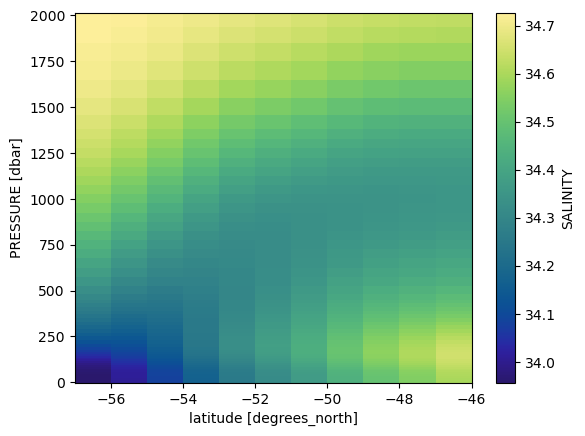

In [17]:
arg_20_sal_wh_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline')

In [18]:
arg_20_temp_wh_lon_lat_06_19_avg_lon_tim

<xarray.DataArray 'TEMPERATURE' (PRESSURE: 58, LATITUDE: 11)>
array([[ 4.7258606,  5.6297293,  6.495445 ,  7.3353834,  8.1036005,
         8.69592  ,  9.214582 ,  9.789244 , 10.343587 , 10.919819 ,
        11.571783 ],
       [ 4.720199 ,  5.6243205,  6.490031 ,  7.330524 ,  8.098684 ,
         8.689104 ,  9.205488 ,  9.778418 , 10.330461 , 10.904661 ,
        11.554612 ],
       [ 4.7049127,  5.6102614,  6.475355 ,  7.316821 ,  8.085909 ,
         8.672116 ,  9.181864 ,  9.75096  , 10.297178 , 10.865847 ,
        11.509599 ],
       [ 4.688664 ,  5.5949497,  6.457448 ,  7.2993374,  8.069489 ,
         8.648563 ,  9.147262 ,  9.706424 , 10.243953 , 10.806336 ,
        11.440252 ],
       [ 4.657809 ,  5.5662117,  6.4281154,  7.271233 ,  8.041589 ,
         8.612124 ,  9.095571 ,  9.639696 , 10.1625595, 10.712059 ,
        11.329266 ],
       [ 4.610822 ,  5.523075 ,  6.387866 ,  7.2322264,  8.0018635,
         8.558806 ,  9.021908 ,  9.552371 , 10.054085 , 10.577096 ,
        11.164594 ],
       [ 4.5418077,  5.458013 ,  6.331402 ,  7.1763277,  7.9415264,
         8.482524 ,  8.923335 ,  9.442663 ,  9.924742 , 10.409145 ,
...
         2.8527577,  2.9535768,  3.0849833,  3.1902766,  3.2535667,
         3.3011758],
       [ 2.170195 ,  2.300545 ,  2.4243925,  2.5482786,  2.6610324,
         2.738557 ,  2.8202393,  2.9279618,  3.013927 ,  3.0644438,
         3.1018698],
       [ 2.1008606,  2.2320402,  2.3524218,  2.4664721,  2.5658126,
         2.629482 ,  2.6937184,  2.7796245,  2.8486314,  2.8899095,
         2.91972  ],
       [ 2.0308688,  2.1640038,  2.283591 ,  2.3920987,  2.4823375,
         2.5369778,  2.5891664,  2.6584892,  2.716074 ,  2.7511845,
         2.7744288],
       [ 1.9582522,  2.0931454,  2.2150528,  2.3221724,  2.407445 ,
         2.4567282,  2.5004082,  2.5577948,  2.6065698,  2.6375828,
         2.6560671],
       [ 1.8841544,  2.0185833,  2.1442351,  2.2524128,  2.3333242,
         2.3815918,  2.4212503,  2.470006 ,  2.510127 ,  2.5371203,
         2.5521326],
       [ 1.8340268,  1.9664375,  2.095248 ,  2.2017295,  2.276338 ,
         2.326404 ,  2.368002 ,  2.4115052,  2.44681  ,  2.470073 ,
         2.4814372]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03

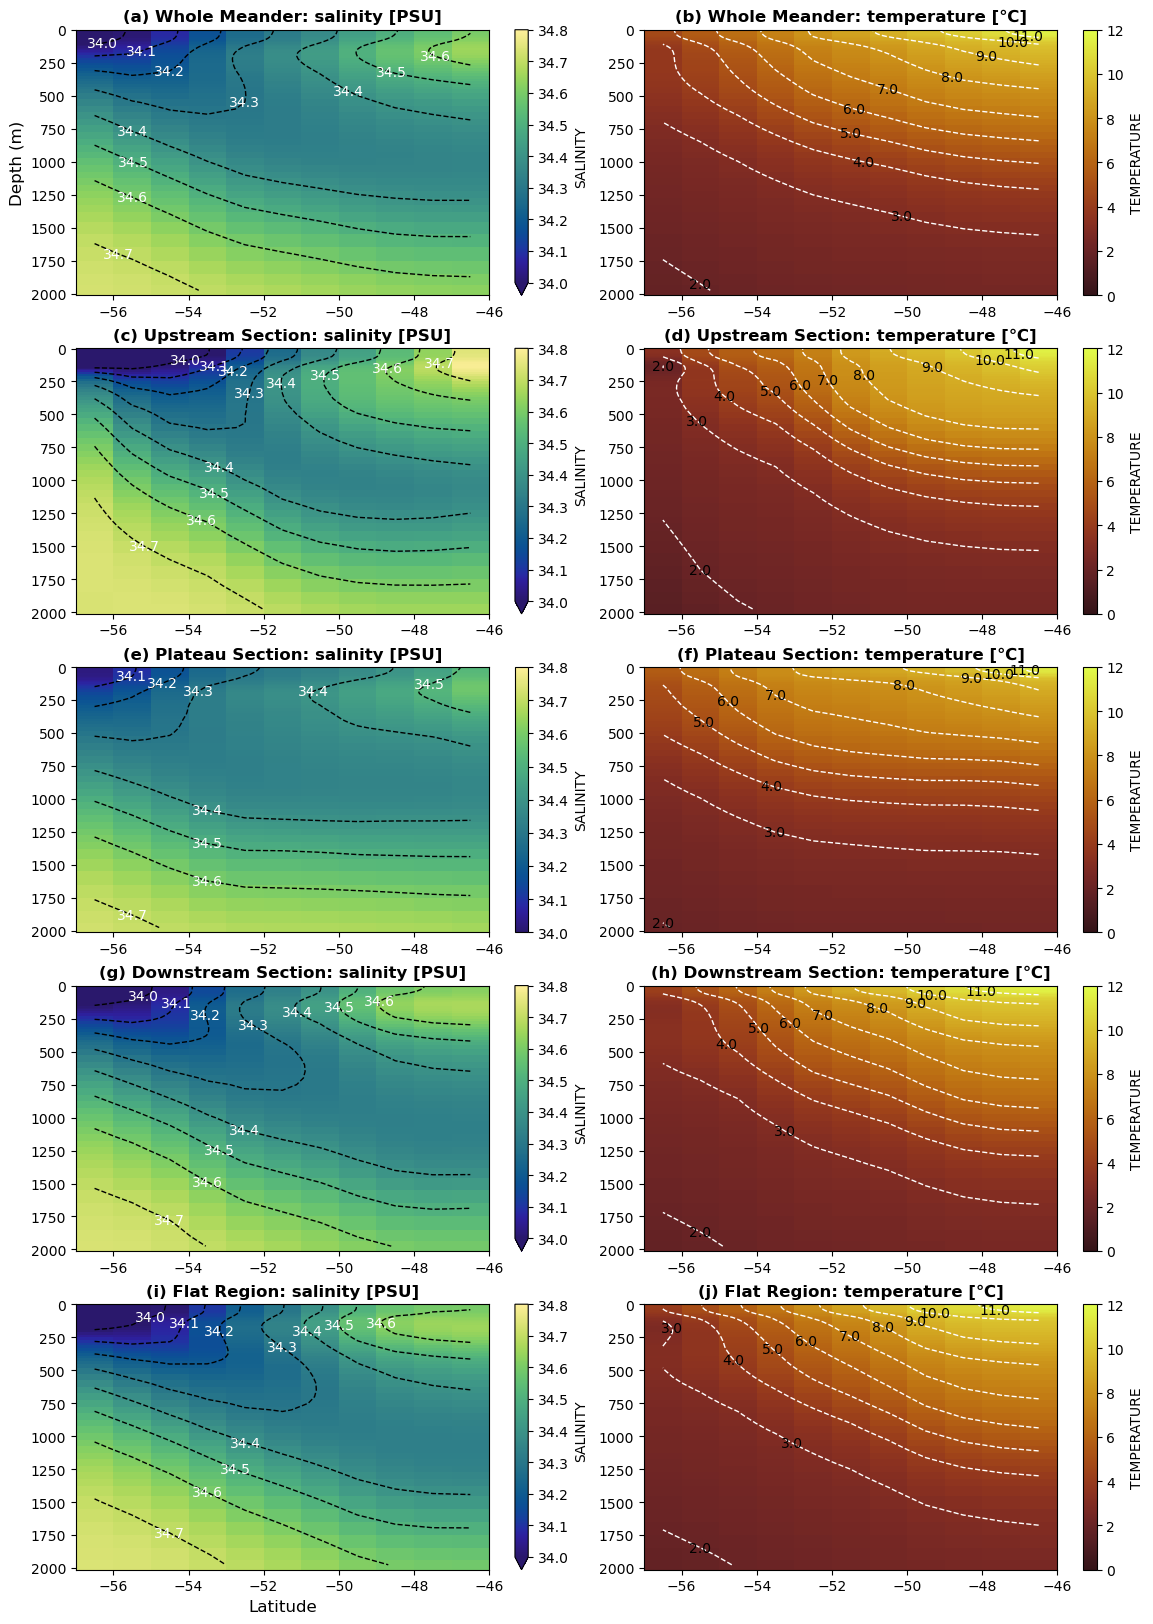

In [19]:
# Plot the 2006-2020 mean depth-latitude structure of the average
# temperature and salinity in the whole CP region and other four sections

fig = plt.figure(figsize=(14, 20))

# Plotting the mean 2006-2019 salinity (whole CP region)
ax1 = fig.add_subplot(5, 2, 1)
arg_sal_plot_wh = arg_20_sal_wh_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline', ax=ax1, vmin=34.0, vmax=34.8)
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander: salinity [PSU]', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth (m)', fontsize=12)

cont_sal_val = [34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8]  # Set the contour levels you want to display
cont_sal_lin_wh = ax1.contour(arg_20_sal_wh_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_val, cont_sal_lin_wh.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 5]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='white', fontsize=10, ha='center', va='center')



# Plotting the mean 2006-2019 temperature (whole CP region)
ax2 = fig.add_subplot(5, 2, 2)
arg_temp_plot_wh = arg_20_temp_wh_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.solar', ax=ax2, vmin=0, vmax=12)
ax2.invert_yaxis()
ax2.set_title('(b) Whole Meander: temperature [℃]', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')
ax2.set_ylabel('')

cont_temp_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Set the contour levels you want to display
cont_temp_lin_wh = ax2.contour(arg_20_temp_wh_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_val, colors='white', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_wh.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 5]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.1f}', color='black', fontsize=10, ha='center', va='center')


# Upstream section
# Plotting the mean 2006-2019 salinity (upstream section)
ax3 = fig.add_subplot(5, 2, 3)
arg_sal_plot_up = arg_20_sal_up_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline', ax=ax3, vmin=34.0, vmax=34.8)
ax3.invert_yaxis()
ax3.set_title('(c) Upstream Section: salinity [PSU]', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')
ax3.set_ylabel('')

cont_sal_lin_up = ax3.contour(arg_20_sal_up_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_up_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_up_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax3
for level, contour in zip(cont_sal_val, cont_sal_lin_up.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax3.text(x, y, f'{level:.1f}', color='white', fontsize=10, ha='center', va='center')

        
# Plotting the mean 2006-2019 temperature (upstream section)
ax4 = fig.add_subplot(5, 2, 4)
arg_temp_plot_up = arg_20_temp_up_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.solar', ax=ax4, vmin=0, vmax=12)
ax4.invert_yaxis()
ax4.set_title('(d) Upstream Section: temperature [℃]', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')
ax4.set_ylabel('')

# Annotate the contour values for ax4
cont_temp_lin_up = ax4.contour(arg_20_temp_up_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_up_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_up_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_val, colors='white', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_up.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax4.text(x, y, f'{level:.1f}', color='black', fontsize=10, ha='center', va='center')


# Plateau section
# Plotting the mean 2006-2019 salinity (plateau section)
ax5 = fig.add_subplot(5, 2, 5)
arg_sal_plot_pl = arg_20_sal_pl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline', ax=ax5, vmin=34.0, vmax=34.8)
ax5.invert_yaxis()
ax5.set_title('(e) Plateau Section: salinity [PSU]', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')
ax5.set_ylabel('')

cont_sal_lin_pl = ax5.contour(arg_20_sal_pl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_pl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_pl_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax5
for level, contour in zip(cont_sal_val, cont_sal_lin_pl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax5.text(x, y, f'{level:.1f}', color='white', fontsize=10, ha='center', va='center')


# Plotting the mean 2006-2019 temperature (plateau section)
ax6 = fig.add_subplot(5, 2, 6)
arg_temp_plot_pl = arg_20_temp_pl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.solar', ax=ax6, vmin=0, vmax=12)
ax6.invert_yaxis()
ax6.set_title('(f) Plateau Section: temperature [℃]', fontweight='bold')
ax6.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax6.set_xlabel('')
ax6.set_ylabel('')

# Annotate the contour values for ax6
cont_temp_lin_pl = ax6.contour(arg_20_temp_pl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_val, colors='white', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_pl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax6.text(x, y, f'{level:.1f}', color='black', fontsize=10, ha='center', va='center')


# Downstream section
# Plotting the mean 2006-2019 salinity (downstream section)
ax7 = fig.add_subplot(5, 2, 7)
arg_sal_plot_dw = arg_20_sal_dw_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline', ax=ax7, vmin=34.0, vmax=34.8)
ax7.invert_yaxis()
ax7.set_title('(g) Downstream Section: salinity [PSU]', fontweight='bold')
ax7.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax7.set_xlabel('')
ax7.set_ylabel('')

cont_sal_lin_dw = ax7.contour(arg_20_sal_dw_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_dw_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_dw_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax7
for level, contour in zip(cont_sal_val, cont_sal_lin_dw.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax7.text(x, y, f'{level:.1f}', color='white', fontsize=10, ha='center', va='center')


# Plotting the mean 2006-2019 temperature (downstream section)
ax8 = fig.add_subplot(5, 2, 8)
arg_temp_plot_dw = arg_20_temp_dw_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.solar', ax=ax8, vmin=0, vmax=12)
ax8.invert_yaxis()
ax8.set_title('(h) Downstream Section: temperature [℃]', fontweight='bold')
ax8.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax8.set_xlabel('')
ax8.set_ylabel('')

# Annotate the contour values for ax8
cont_temp_lin_dw = ax8.contour(arg_20_temp_dw_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_val, colors='white', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_dw.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax8.text(x, y, f'{level:.1f}', color='black', fontsize=10, ha='center', va='center')

        
# Flat region
# Plotting the mean 2006-2019 salinity (downstream section)
ax9 = fig.add_subplot(5, 2, 9)
arg_sal_plot_fl = arg_20_sal_fl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.haline', ax=ax9, vmin=34.0, vmax=34.8)
ax9.invert_yaxis()
ax9.set_title('(i) Flat Region: salinity [PSU]', fontweight='bold')
ax9.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax9.set_xlabel('Latitude', fontsize=12)
ax9.set_ylabel('')

cont_sal_lin_fl = ax9.contour(arg_20_sal_fl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_fl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_fl_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax9
for level, contour in zip(cont_sal_val, cont_sal_lin_fl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax9.text(x, y, f'{level:.1f}', color='white', fontsize=10, ha='center', va='center')

# Plotting the mean 2006-2019 temperature (flat region)
ax10 = fig.add_subplot(5, 2, 10)
arg_temp_plot_fl = arg_20_temp_fl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.solar', ax=ax10, vmin=0, vmax=12)
ax10.invert_yaxis()
ax10.set_title('(j) Flat Region: temperature [℃]', fontweight='bold')
ax10.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax10.set_xlabel('')
ax10.set_ylabel('')

# Annotate the contour values for ax10
cont_temp_lin_fl = ax10.contour(arg_20_temp_fl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_val, colors='white', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_fl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax10.text(x, y, f'{level:.1f}', color='black', fontsize=10, ha='center', va='center')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)

plt.show()

# Save the figure
#fig.savefig(f'cp_region_2006_2020_mean_sal_temp_dep_lat.png', dpi=600, bbox_inches='tight')

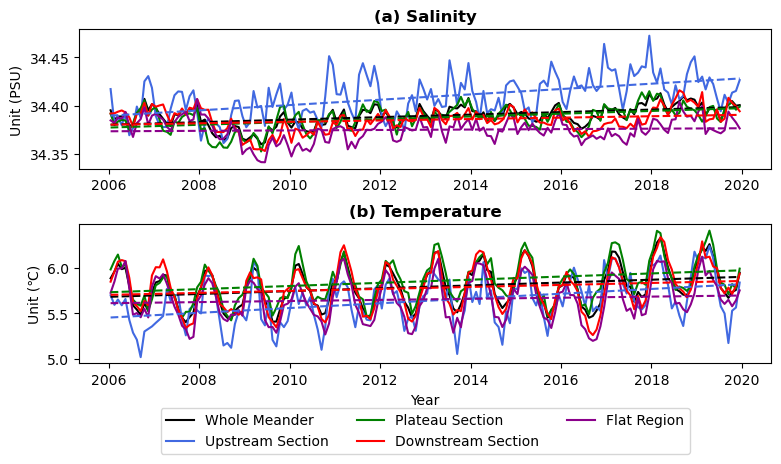

In [20]:
# Time series of the temperature and salinity in the CP region and four sections
fig = plt.figure(figsize=(8, 5))  # Increased the figure size

# Campbell Plateau region

# Salinity time series
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(arg_20_time_06_19, arg_20_sal_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='black', label='Whole Meander')
ax1.plot(arg_20_time_06_19, arg_20_sal_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='royalblue', label='Upstream Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='green', label='Plateau Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='red', label='Downstream Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='darkmagenta', label='Flat Region')

# Whole Meander: 
# Perform linear regression
slope_arg_20_sal_wh_lon_lat_06_19, intercept_arg_20_sal_wh_lon_lat_06_19,\
r_arg_20_sal_wh_lon_lat_06_19, p_arg_20_sal_wh_lon_lat_06_19, std_err_arg_20_sal_wh_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_wh_lon_lat_06_19 = slope_arg_20_sal_wh_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_wh_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_wh_lon_lat_06_19 = r_arg_20_sal_wh_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_wh_lon_lat_06_19, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_wh_lon_lat_06_19_str = '{:.3f}'.format(slope_arg_20_sal_wh_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_wh_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_wh_lon_lat_06_19)
r_squ_arg_20_sal_wh_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_wh_lon_lat_06_19)


# Upstream Section: 
# Perform linear regression
slope_arg_20_sal_up_lon_lat_06_19, intercept_arg_20_sal_up_lon_lat_06_19,\
r_arg_20_sal_up_lon_lat_06_19, p_arg_20_sal_up_lon_lat_06_19, std_err_arg_20_sal_up_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_up_lon_lat_06_19 = slope_arg_20_sal_up_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_up_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_up_lon_lat_06_19 = r_arg_20_sal_up_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_up_lon_lat_06_19, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_up_lon_lat_06_19_str = '{:.3f}'.format(slope_arg_20_sal_up_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_up_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_up_lon_lat_06_19)
r_squ_arg_20_sal_up_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_up_lon_lat_06_19)


# Plateau Section: 
# Perform linear regression
slope_arg_20_sal_pl_lon_lat_06_19, intercept_arg_20_sal_pl_lon_lat_06_19,\
r_arg_20_sal_pl_lon_lat_06_19, p_arg_20_sal_pl_lon_lat_06_19, std_err_arg_20_sal_pl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_pl_lon_lat_06_19 = slope_arg_20_sal_pl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_pl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_pl_lon_lat_06_19 = r_arg_20_sal_pl_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_pl_lon_lat_06_19, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_pl_lon_lat_06_19_str = '{:.3f}'.format(slope_arg_20_sal_pl_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_pl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_pl_lon_lat_06_19)
r_squ_arg_20_sal_pl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_pl_lon_lat_06_19)


# Downstream Section: 
# Perform linear regression
slope_arg_20_sal_dw_lon_lat_06_19, intercept_arg_20_sal_dw_lon_lat_06_19,\
r_arg_20_sal_dw_lon_lat_06_19, p_arg_20_sal_dw_lon_lat_06_19, std_err_arg_20_sal_dw_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_dw_lon_lat_06_19 = slope_arg_20_sal_dw_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_dw_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_dw_lon_lat_06_19 = r_arg_20_sal_dw_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_dw_lon_lat_06_19, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_dw_lon_lat_06_19_str = '{:.3f}'.format(slope_arg_20_sal_dw_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_dw_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_dw_lon_lat_06_19)
r_squ_arg_20_sal_dw_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_dw_lon_lat_06_19)


# Flat region: 
# Perform linear regression
slope_arg_20_sal_fl_lon_lat_06_19, intercept_arg_20_sal_fl_lon_lat_06_19,\
r_arg_20_sal_fl_lon_lat_06_19, p_arg_20_sal_fl_lon_lat_06_19, std_err_arg_20_sal_fl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_fl_lon_lat_06_19 = slope_arg_20_sal_fl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_fl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_fl_lon_lat_06_19 = r_arg_20_sal_fl_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_fl_lon_lat_06_19, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_fl_lon_lat_06_19_str = '{:.3f}'.format(slope_arg_20_sal_fl_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_fl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_fl_lon_lat_06_19)
r_squ_arg_20_sal_fl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_fl_lon_lat_06_19)

ax1.set_title('(a) Salinity', fontweight='bold')
ax1.title.set_position([0.5, 0.6])  # Adjust the position of the title within the subplot

# Set x-axis ticks and labels
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_ylabel('Unit (PSU)')
ax1.set_xlabel('')

# Format x-axis as dates
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())



# Temperature time series
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(arg_20_time_06_19, arg_20_temp_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='black', label='Whole Meander')
ax2.plot(arg_20_time_06_19, arg_20_temp_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='royalblue', label='Upstream Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='green', label='Plateau Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='red', label='Downstream Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='darkmagenta', label='Flat Region')


# Whole Meander: 
# Perform linear regression
slope_arg_20_temp_wh_lon_lat_06_19, intercept_arg_20_temp_wh_lon_lat_06_19,\
r_arg_20_temp_wh_lon_lat_06_19, p_arg_20_temp_wh_lon_lat_06_19, std_err_arg_20_temp_wh_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_wh_lon_lat_06_19 = slope_arg_20_temp_wh_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_wh_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_wh_lon_lat_06_19 = r_arg_20_temp_wh_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_wh_lon_lat_06_19, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_wh_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_wh_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_wh_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_wh_lon_lat_06_19)
r_squ_arg_20_temp_wh_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_wh_lon_lat_06_19)


# Upstream Section: 
# Perform linear regression
slope_arg_20_temp_up_lon_lat_06_19, intercept_arg_20_temp_up_lon_lat_06_19,\
r_arg_20_temp_up_lon_lat_06_19, p_arg_20_temp_up_lon_lat_06_19, std_err_arg_20_temp_up_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_up_lon_lat_06_19 = slope_arg_20_temp_up_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_up_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_up_lon_lat_06_19 = r_arg_20_temp_up_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_up_lon_lat_06_19, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_up_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_up_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_up_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_up_lon_lat_06_19)
r_squ_arg_20_temp_up_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_up_lon_lat_06_19)


# Plateau Section: 
# Perform linear regression
slope_arg_20_temp_pl_lon_lat_06_19, intercept_arg_20_temp_pl_lon_lat_06_19,\
r_arg_20_temp_pl_lon_lat_06_19, p_arg_20_temp_pl_lon_lat_06_19, std_err_arg_20_temp_pl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_pl_lon_lat_06_19 = slope_arg_20_temp_pl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_pl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_pl_lon_lat_06_19 = r_arg_20_temp_pl_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_pl_lon_lat_06_19, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_pl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_pl_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_pl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_pl_lon_lat_06_19)
r_squ_arg_20_temp_pl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_pl_lon_lat_06_19)


# Downstream Section: 
# Perform linear regression
slope_arg_20_temp_dw_lon_lat_06_19, intercept_arg_20_temp_dw_lon_lat_06_19,\
r_arg_20_temp_dw_lon_lat_06_19, p_arg_20_temp_dw_lon_lat_06_19, std_err_arg_20_temp_dw_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_dw_lon_lat_06_19 = slope_arg_20_temp_dw_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_dw_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_dw_lon_lat_06_19 = r_arg_20_temp_dw_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_dw_lon_lat_06_19, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_dw_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_dw_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_dw_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_dw_lon_lat_06_19)
r_squ_arg_20_temp_dw_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_dw_lon_lat_06_19)


# Flat region: 
# Perform linear regression
slope_arg_20_temp_fl_lon_lat_06_19, intercept_arg_20_temp_fl_lon_lat_06_19,\
r_arg_20_temp_fl_lon_lat_06_19, p_arg_20_temp_fl_lon_lat_06_19, std_err_arg_20_temp_fl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_fl_lon_lat_06_19 = slope_arg_20_temp_fl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_fl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_fl_lon_lat_06_19 = r_arg_20_temp_fl_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_fl_lon_lat_06_19, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_fl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_fl_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_fl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_fl_lon_lat_06_19)
r_squ_arg_20_temp_fl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_fl_lon_lat_06_19)

ax2.set_title('(b) Temperature', fontweight='bold')
ax2.title.set_position([0.5, 0.6])  # Adjust the position of the title within the subplot

ax2.set_ylabel('Unit (℃)')
ax2.set_xlabel('Year')

# Set x-axis ticks and labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(200))

# Format x-axis as dates
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())

# Add a legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=3)

# Adjust the layout
plt.tight_layout()

plt.subplots_adjust(hspace=0.4)  # Increase the vertical spacing between subplots

# Show the plot
plt.show()

# Save the figure
#fig.savefig(f'cp_region_2006_2020_sal_temp_time_series.png', dpi=600, bbox_inches='tight')

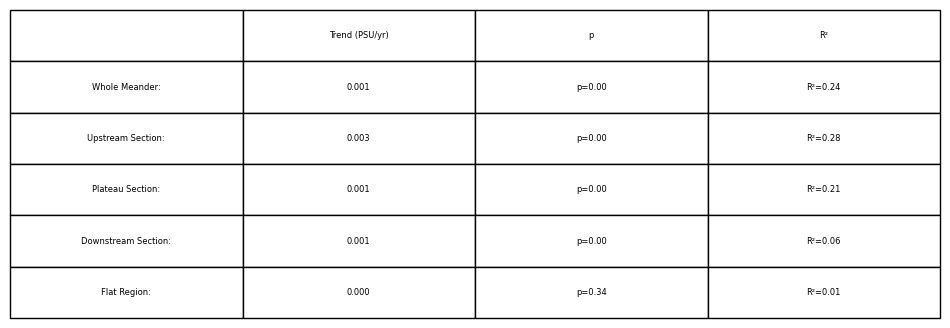

In [21]:
# Table of these salinity trends and their corresponding statistics
# Define the table data
table_sal_06_19 = [
    ['', 'Trend (PSU/yr)', 'p', 'R\u00b2'],
    ['Whole Meander:', slope_arg_20_sal_wh_lon_lat_06_19_str, p_arg_20_sal_wh_lon_lat_06_19_str, r_squ_arg_20_sal_wh_lon_lat_06_19_str],
    ['Upstream Section:', slope_arg_20_sal_up_lon_lat_06_19_str, p_arg_20_sal_up_lon_lat_06_19_str, r_squ_arg_20_sal_up_lon_lat_06_19_str],
    ['Plateau Section:', slope_arg_20_sal_pl_lon_lat_06_19_str, p_arg_20_sal_pl_lon_lat_06_19_str, r_squ_arg_20_sal_pl_lon_lat_06_19_str],
    ['Downstream Section:', slope_arg_20_sal_dw_lon_lat_06_19_str, p_arg_20_sal_dw_lon_lat_06_19_str, r_squ_arg_20_sal_dw_lon_lat_06_19_str],
    ['Flat Region:', slope_arg_20_sal_fl_lon_lat_06_19_str, p_arg_20_sal_fl_lon_lat_06_19_str, r_squ_arg_20_sal_fl_lon_lat_06_19_str],
]

# Create a separate figure for the table
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes to show only the table
ax.axis('off')

# Table settings
table_x = 0
table_y = 0
table_width = 2.0
table_height = 1.0

# Create the table
table = ax.table(cellText=table_sal_06_19, cellLoc='center', loc='center',
                 bbox=[table_x, table_y, table_width, table_height])

# Set the fontsize for the entire table
font_size = 12
for cell in table.get_celld().values():
    cell.set_fontsize(font_size)

# Show the table
plt.show()

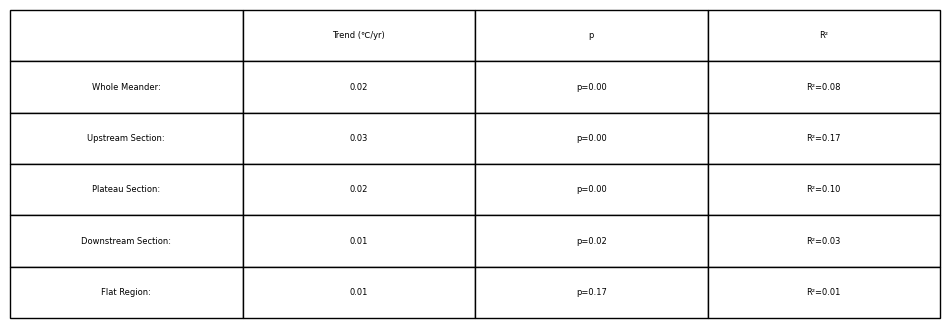

In [22]:
# Table of these temperature trends and their corresponding statistics
# Define the table data
table_temp_06_19 = [
    ['', 'Trend (℃/yr)', 'p', 'R\u00b2'],
    ['Whole Meander:', slope_arg_20_temp_wh_lon_lat_06_19_str, p_arg_20_temp_wh_lon_lat_06_19_str, r_squ_arg_20_temp_wh_lon_lat_06_19_str],
    ['Upstream Section:', slope_arg_20_temp_up_lon_lat_06_19_str, p_arg_20_temp_up_lon_lat_06_19_str, r_squ_arg_20_temp_up_lon_lat_06_19_str],
    ['Plateau Section:', slope_arg_20_temp_pl_lon_lat_06_19_str, p_arg_20_temp_pl_lon_lat_06_19_str, r_squ_arg_20_temp_pl_lon_lat_06_19_str],
    ['Downstream Section:', slope_arg_20_temp_dw_lon_lat_06_19_str, p_arg_20_temp_dw_lon_lat_06_19_str, r_squ_arg_20_temp_dw_lon_lat_06_19_str],
    ['Flat Region:', slope_arg_20_temp_fl_lon_lat_06_19_str, p_arg_20_temp_fl_lon_lat_06_19_str, r_squ_arg_20_temp_fl_lon_lat_06_19_str],
]

# Create a separate figure for the table
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes to show only the table
ax.axis('off')

# Table settings
table_x = 0
table_y = 0
table_width = 2.0
table_height = 1.0

# Create the table
table = ax.table(cellText=table_temp_06_19, cellLoc='center', loc='center',
                 bbox=[table_x, table_y, table_width, table_height])

# Set the fontsize for the entire table
font_size = 16
for cell in table.get_celld().values():
    cell.set_fontsize(font_size)

# Show the table
plt.show()

In [23]:
# Average the salinity and temperature over three time periods between 2006 and 2020
# to see if the contours have changed

# salinity
arg_20_sal_wh_lon_lat_06_10 = arg_20_sal_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_wh_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_wh_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_wh_lon_lat_11_15 = arg_20_sal_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_wh_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_sal_wh_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_wh_lon_lat_16_19 = arg_20_sal_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_wh_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_sal_wh_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# temperature
arg_20_temp_wh_lon_lat_06_10 = arg_20_temp_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_wh_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_wh_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_wh_lon_lat_11_15 = arg_20_temp_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_wh_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_temp_wh_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_wh_lon_lat_16_19 = arg_20_temp_wh_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_wh_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_temp_wh_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)

In [24]:
# Average the salinity and temperature over each year for four different sections

# Upstream section
# salinity
arg_20_sal_up_lon_lat_06_10 = arg_20_sal_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_up_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_up_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_up_lon_lat_11_15 = arg_20_sal_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_up_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_sal_up_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_up_lon_lat_16_19 = arg_20_sal_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_up_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_sal_up_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# temperature
arg_20_temp_up_lon_lat_06_10 = arg_20_temp_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_up_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_up_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_up_lon_lat_11_15 = arg_20_temp_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_up_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_temp_up_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_up_lon_lat_16_19 = arg_20_temp_up_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_up_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_temp_up_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# Plateau section
# salinity
arg_20_sal_pl_lon_lat_06_10 = arg_20_sal_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_pl_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_pl_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_pl_lon_lat_11_15 = arg_20_sal_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_pl_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_sal_pl_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_pl_lon_lat_16_19 = arg_20_sal_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_pl_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_sal_pl_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# temperature
arg_20_temp_pl_lon_lat_06_10 = arg_20_temp_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_pl_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_pl_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_pl_lon_lat_11_15 = arg_20_temp_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_pl_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_temp_pl_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_pl_lon_lat_16_19 = arg_20_temp_pl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_pl_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_temp_pl_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# Downstream section
# salinity
arg_20_sal_dw_lon_lat_06_10 = arg_20_sal_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_dw_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_dw_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_dw_lon_lat_11_15 = arg_20_sal_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_dw_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_sal_dw_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_dw_lon_lat_16_19 = arg_20_sal_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_dw_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_sal_dw_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# temperature
arg_20_temp_dw_lon_lat_06_10 = arg_20_temp_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_dw_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_dw_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_dw_lon_lat_11_15 = arg_20_temp_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_dw_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_temp_dw_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_dw_lon_lat_16_19 = arg_20_temp_dw_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_dw_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_temp_dw_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# Flat region
# salinity
arg_20_sal_fl_lon_lat_06_10 = arg_20_sal_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_fl_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_fl_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_fl_lon_lat_11_15 = arg_20_sal_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_fl_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_sal_fl_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_sal_fl_lon_lat_16_19 = arg_20_sal_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_sal_fl_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_sal_fl_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)


# temperature
arg_20_temp_fl_lon_lat_06_10 = arg_20_temp_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_fl_lon_lat_06_19.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_fl_lon_lat_06_19.TIME <= np.datetime64('2010-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_fl_lon_lat_11_15 = arg_20_temp_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_fl_lon_lat_06_19.TIME >= np.datetime64('2011-01-01T00:00:00.000000000')),
        (arg_20_temp_fl_lon_lat_06_19.TIME <= np.datetime64('2015-12-31T00:00:00.000000000'))
    ),
    drop=True)

arg_20_temp_fl_lon_lat_16_19 = arg_20_temp_fl_lon_lat_06_19.where(np.logical_and(
        (arg_20_temp_fl_lon_lat_06_19.TIME >= np.datetime64('2016-01-01T00:00:00.000000000')),
        (arg_20_temp_fl_lon_lat_06_19.TIME <= np.datetime64('2019-12-31T00:00:00.000000000'))
    ),
    drop=True)

In [25]:
# Average the salinity and temperature over each year over the 2006-2019 period in the whole Campbell Plateau region

# whole meander

# salinity
arg_20_sal_wh_lon_lat_06_10_avg_lon_tim = arg_20_sal_wh_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_wh_lon_lat_11_15_avg_lon_tim = arg_20_sal_wh_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_wh_lon_lat_16_19_avg_lon_tim = arg_20_sal_wh_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

# temperature
arg_20_temp_wh_lon_lat_06_10_avg_lon_tim = arg_20_temp_wh_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_wh_lon_lat_11_15_avg_lon_tim = arg_20_temp_wh_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_wh_lon_lat_16_19_avg_lon_tim = arg_20_temp_wh_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

In [26]:
arg_20_sal_wh_lon_lat_06_10_avg_lon_tim

<xarray.DataArray 'SALINITY' (PRESSURE: 58, LATITUDE: 11)>
array([[33.936882, 33.991623, 34.06212 , 34.147243, 34.228943, 34.286167,
        34.340908, 34.41046 , 34.47106 , 34.522972, 34.57922 ],
       [33.937176, 33.991924, 34.0624  , 34.147686, 34.229324, 34.286602,
        34.34134 , 34.410927, 34.471527, 34.5237  , 34.58016 ],
       [33.937756, 33.992332, 34.062992, 34.148304, 34.23006 , 34.287434,
        34.34207 , 34.411835, 34.47282 , 34.524967, 34.58167 ],
       [33.938686, 33.993114, 34.063763, 34.149418, 34.231327, 34.28835 ,
        34.34292 , 34.413223, 34.474545, 34.526558, 34.583565],
       [33.9396  , 33.994034, 34.064632, 34.150387, 34.23237 , 34.289455,
        34.34411 , 34.414845, 34.47643 , 34.528923, 34.586647],
       [33.94114 , 33.9955  , 34.066223, 34.152065, 34.23394 , 34.290966,
        34.34629 , 34.417652, 34.479366, 34.532787, 34.5911  ],
       [33.943485, 33.99777 , 34.06874 , 34.154785, 34.236183, 34.29293 ,
        34.349228, 34.42164 , 34.48383 , 34.537373, 34.595802],
       [33.94745 , 34.00138 , 34.07268 , 34.159046, 34.23983 , 34.29662 ,
        34.35415 , 34.427086, 34.49002 , 34.543655, 34.601593],
       [33.953312, 34.006794, 34.078426, 34.165047, 34.245373, 34.302296,
        34.360363, 34.434013, 34.49777 , 34.550884, 34.60782 ],
       [33.960953, 34.013527, 34.085144, 34.171497, 34.251785, 34.30909 ,
        34.368298, 34.442665, 34.506393, 34.558662, 34.614483],
...
        34.422176, 34.4039  , 34.39441 , 34.39107 , 34.392506],
       [34.64256 , 34.608162, 34.567028, 34.521427, 34.48209 , 34.461174,
        34.442757, 34.42255 , 34.411015, 34.406418, 34.40701 ],
       [34.654037, 34.62244 , 34.583946, 34.540234, 34.50206 , 34.481857,
        34.462883, 34.44132 , 34.428135, 34.422577, 34.42288 ],
       [34.666767, 34.638813, 34.603634, 34.562527, 34.52618 , 34.506897,
        34.487778, 34.46558 , 34.450985, 34.444637, 34.444916],
       [34.68231 , 34.658867, 34.628387, 34.591354, 34.558193, 34.53991 ,
        34.521534, 34.499638, 34.484146, 34.477665, 34.47796 ],
       [34.696747, 34.678276, 34.65297 , 34.620667, 34.591522, 34.574947,
        34.557713, 34.53695 , 34.522022, 34.51547 , 34.515526],
       [34.707947, 34.693985, 34.673557, 34.64618 , 34.62136 , 34.60617 ,
        34.59043 , 34.571587, 34.557495, 34.551212, 34.551064],
       [34.716698, 34.70685 , 34.69058 , 34.667694, 34.64673 , 34.633324,
        34.619457, 34.602623, 34.589706, 34.583317, 34.582073],
       [34.72348 , 34.716694, 34.703964, 34.685585, 34.668625, 34.65663 ,
        34.643986, 34.629337, 34.61804 , 34.61161 , 34.6091  ],
       [34.726555, 34.72159 , 34.7113  , 34.696835, 34.68266 , 34.670704,
        34.6585  , 34.645607, 34.635677, 34.629673, 34.62681 ]],
      dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03

In [27]:
# Upstream section
# salinity
arg_20_sal_up_lon_lat_06_10_avg_lon_tim = arg_20_sal_up_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_up_lon_lat_11_15_avg_lon_tim = arg_20_sal_up_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_up_lon_lat_16_19_avg_lon_tim = arg_20_sal_up_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

# temperature
arg_20_temp_up_lon_lat_06_10_avg_lon_tim = arg_20_temp_up_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_up_lon_lat_11_15_avg_lon_tim = arg_20_temp_up_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_up_lon_lat_16_19_avg_lon_tim = arg_20_temp_up_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])


# Plateau section
# salinity
arg_20_sal_pl_lon_lat_06_10_avg_lon_tim = arg_20_sal_pl_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_pl_lon_lat_11_15_avg_lon_tim = arg_20_sal_pl_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_pl_lon_lat_16_19_avg_lon_tim = arg_20_sal_pl_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

# temperature
arg_20_temp_pl_lon_lat_06_10_avg_lon_tim = arg_20_temp_pl_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_pl_lon_lat_11_15_avg_lon_tim = arg_20_temp_pl_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_pl_lon_lat_16_19_avg_lon_tim = arg_20_temp_pl_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])


# Downstream section
# salinity
arg_20_sal_dw_lon_lat_06_10_avg_lon_tim = arg_20_sal_dw_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_dw_lon_lat_11_15_avg_lon_tim = arg_20_sal_dw_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_dw_lon_lat_16_19_avg_lon_tim = arg_20_sal_dw_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

# temperature
arg_20_temp_dw_lon_lat_06_10_avg_lon_tim = arg_20_temp_dw_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_dw_lon_lat_11_15_avg_lon_tim = arg_20_temp_dw_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_dw_lon_lat_16_19_avg_lon_tim = arg_20_temp_dw_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])


# Flat region
# salinity
arg_20_sal_fl_lon_lat_06_10_avg_lon_tim = arg_20_sal_fl_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_fl_lon_lat_11_15_avg_lon_tim = arg_20_sal_fl_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_sal_fl_lon_lat_16_19_avg_lon_tim = arg_20_sal_fl_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

# temperature
arg_20_temp_fl_lon_lat_06_10_avg_lon_tim = arg_20_temp_fl_lon_lat_06_10.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_fl_lon_lat_11_15_avg_lon_tim = arg_20_temp_fl_lon_lat_11_15.mean(dim=['TIME', 'LONGITUDE'])
arg_20_temp_fl_lon_lat_16_19_avg_lon_tim = arg_20_temp_fl_lon_lat_16_19.mean(dim=['TIME', 'LONGITUDE'])

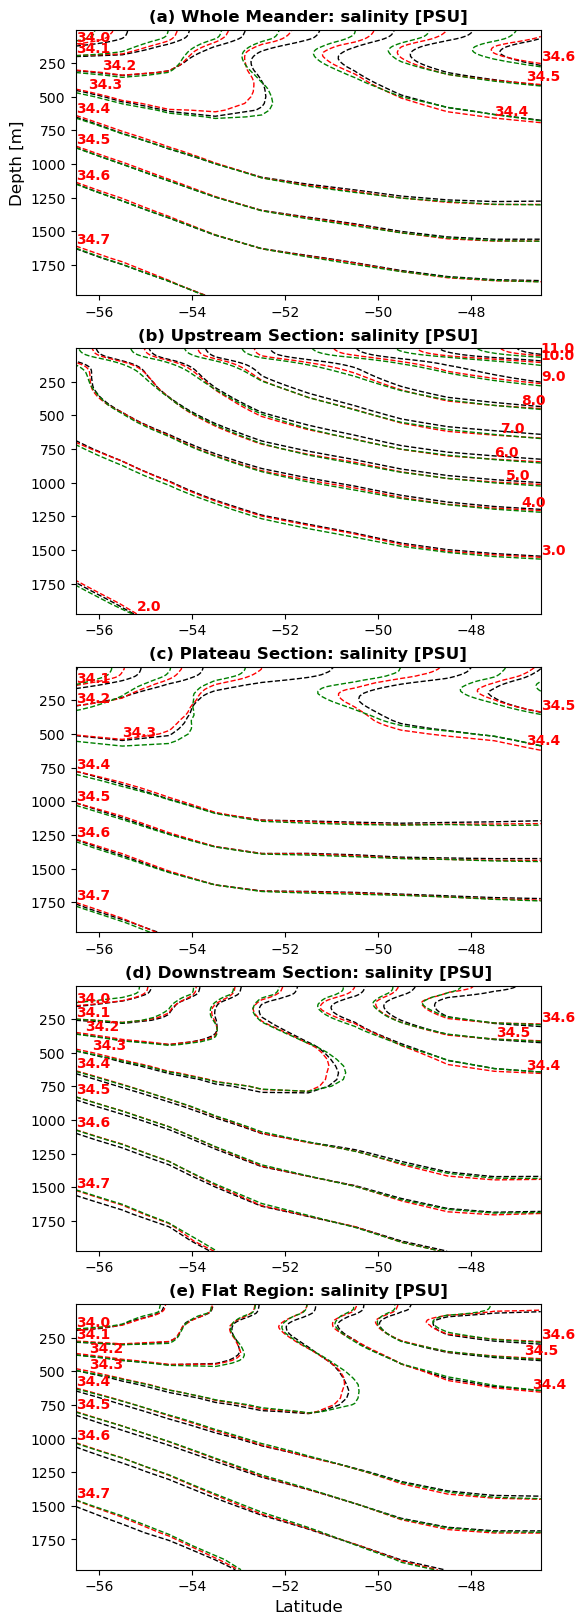

In [28]:
# In this figure, we only plot the contours of salinity in different sections of the Campbell Plateau region

fig = plt.figure(figsize=(6, 20))

# whole meander
ax1 = fig.add_subplot(5, 1, 1)
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander: salinity [PSU]', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth [m]', fontsize=12)

cont_sal_val = [34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8]  # Set the contour levels you want to display

# Contours in three periods
cont_sal_lin_wh_06_10 = ax1.contour(arg_20_sal_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_sal_val, colors='black', linewidths=1, linestyles='--')

cont_sal_lin_wh_11_15 = ax1.contour(arg_20_sal_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_sal_val, colors='red', linewidths=1, linestyles='--')

cont_sal_lin_wh_16_19 = ax1.contour(arg_20_sal_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_sal_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax1
for level, contour in zip(cont_sal_val, cont_sal_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')


# Upstream Section        
ax2 = fig.add_subplot(5, 1, 2)
ax2.invert_yaxis()
ax2.set_title('(b) Upstream Section: salinity [PSU]', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')

# mean contours in three time periods
cont_temp_lin_wh_06_10 = ax2.contour(arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_wh_11_15 = ax2.contour(arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_wh_16_19 = ax2.contour(arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax2
for level, contour in zip(cont_temp_val, cont_temp_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Plateau section
# Plot the annual mean salinity contour movement (plateau section)
ax3 = fig.add_subplot(5, 1, 3)
ax3.invert_yaxis()
ax3.set_title('(c) Plateau Section: salinity [PSU]', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')

# 2006 mean contour
cont_sal_lin_pl_06_10 = ax3.contour(arg_20_sal_pl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_sal_pl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_pl_lon_lat_06_10_avg_lon_tim.values, levels=cont_sal_val, colors='black', linewidths=1, linestyles='--')

cont_sal_lin_pl_11_15 = ax3.contour(arg_20_sal_pl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_sal_pl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_pl_lon_lat_11_15_avg_lon_tim.values, levels=cont_sal_val, colors='red', linewidths=1, linestyles='--')

cont_sal_lin_pl_16_19 = ax3.contour(arg_20_sal_pl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_pl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_pl_lon_lat_16_19_avg_lon_tim.values, levels=cont_sal_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax5
for level, contour in zip(cont_sal_val, cont_sal_lin_pl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax3.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Downstream section
# Plot the annual mean salinity contour movement (downstream section)
ax4 = fig.add_subplot(5, 1, 4)
ax4.invert_yaxis()
ax4.set_title('(d) Downstream Section: salinity [PSU]', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')

# 2006 mean contour
cont_sal_lin_dw_06_10 = ax4.contour(arg_20_sal_dw_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_sal_dw_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_dw_lon_lat_06_10_avg_lon_tim.values, levels=cont_sal_val, colors='black', linewidths=1, linestyles='--')

cont_sal_lin_dw_11_15 = ax4.contour(arg_20_sal_dw_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_sal_dw_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_dw_lon_lat_11_15_avg_lon_tim.values, levels=cont_sal_val, colors='red', linewidths=1, linestyles='--')

cont_sal_lin_dw_16_19 = ax4.contour(arg_20_sal_dw_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_dw_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_dw_lon_lat_16_19_avg_lon_tim.values, levels=cont_sal_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax7
for level, contour in zip(cont_sal_val, cont_sal_lin_dw_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax4.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Flat region
# Plot the annual mean salinity contour movement (flat region)
ax5 = fig.add_subplot(5, 1, 5)
ax5.invert_yaxis()
ax5.set_title('(e) Flat Region: salinity [PSU]', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('Latitude', fontsize=12)

# 2006 mean contour
cont_sal_lin_fl_06_10 = ax5.contour(arg_20_sal_fl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_sal_fl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_fl_lon_lat_06_10_avg_lon_tim.values, levels=cont_sal_val, colors='black', linewidths=1, linestyles='--')

cont_sal_lin_fl_11_15 = ax5.contour(arg_20_sal_fl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_sal_fl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_fl_lon_lat_11_15_avg_lon_tim.values, levels=cont_sal_val, colors='red', linewidths=1, linestyles='--')

cont_sal_lin_fl_16_19 = ax5.contour(arg_20_sal_fl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_fl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_fl_lon_lat_16_19_avg_lon_tim.values, levels=cont_sal_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax9
for level, contour in zip(cont_sal_val, cont_sal_lin_fl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax5.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
# Save the figure
#fig.savefig(f'cp_region_2006_2020_sal_cont_dep.png', dpi=600, bbox_inches='tight')

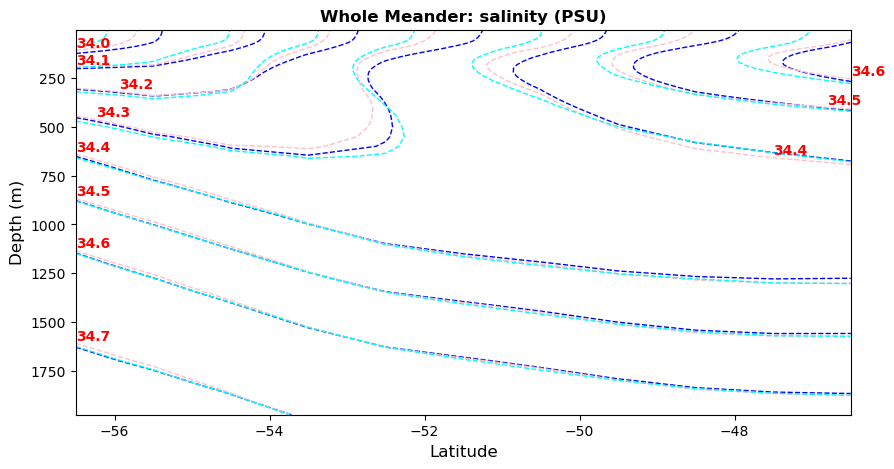

In [31]:
# Now we only plot the depth-latitude structures of the temperature contours in the whole meander region

fig = plt.figure(figsize=(10, 5))

# whole meander
ax1 = fig.add_subplot(1, 1, 1)
ax1.invert_yaxis()
ax1.set_title('Whole Meander: salinity (PSU)', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('Latitude', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)

cont_sal_val = [34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8]  # Set the contour levels you want to display

# Contours in three periods
cont_sal_lin_wh_06_10 = ax1.contour(arg_20_sal_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_sal_val, colors='blue', linewidths=1, linestyles='--')

cont_sal_lin_wh_11_15 = ax1.contour(arg_20_sal_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_sal_val, colors='pink', linewidths=1, linestyles='--')

cont_sal_lin_wh_16_19 = ax1.contour(arg_20_sal_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_sal_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_sal_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax1
for level, contour in zip(cont_sal_val, cont_sal_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')

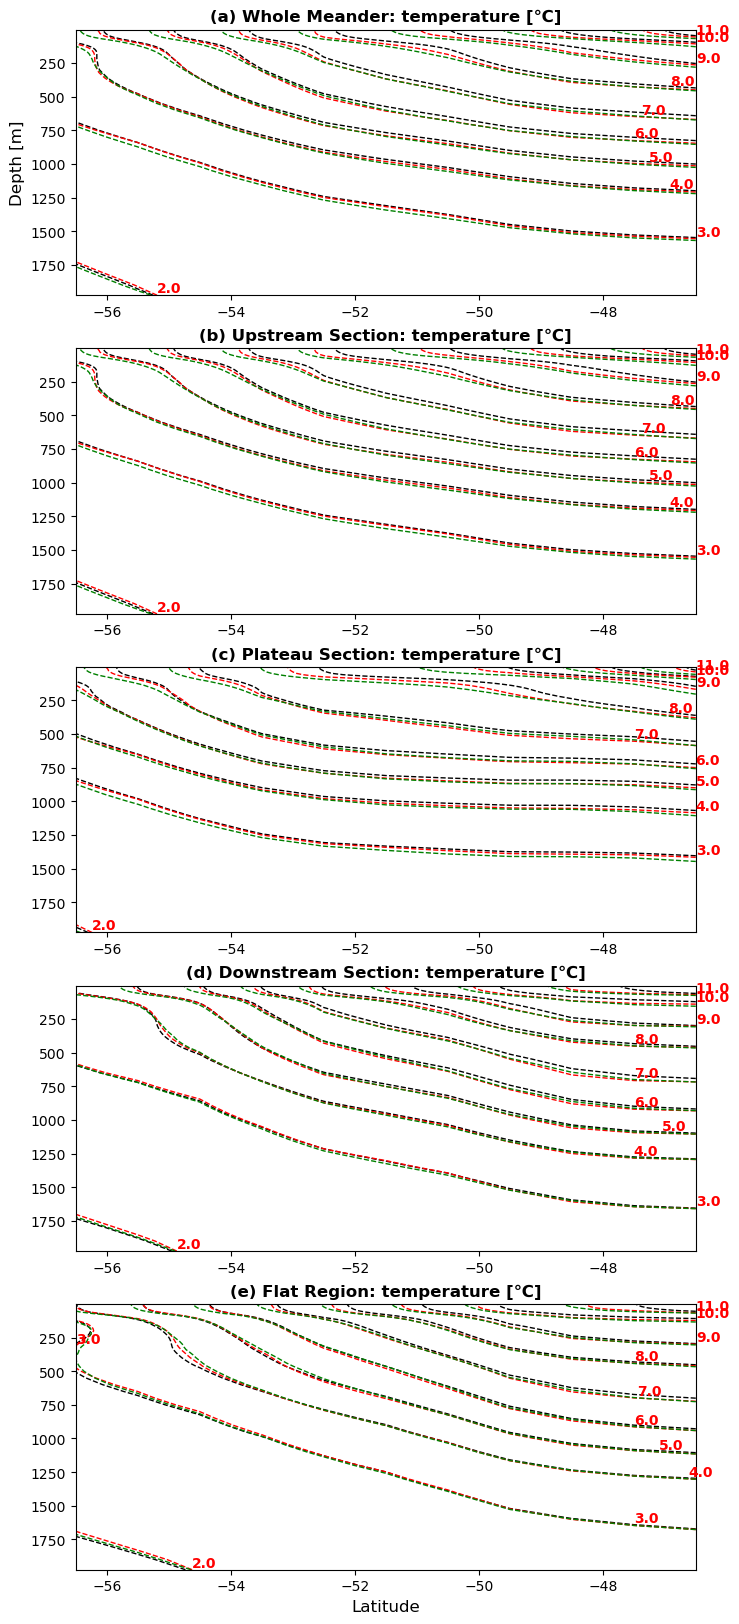

In [53]:
# In this figure, we only plot the contours of temperature in different sections of the Campbell Plateau region

fig = plt.figure(figsize=(8, 20))

# whole meander
ax1 = fig.add_subplot(5, 1, 1)
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander: temperature [℃]', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth [m]', fontsize=12)

cont_temp_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Set the contour levels you want to display

# Contours in three periods
cont_temp_lin_wh_06_10 = ax1.contour(arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_wh_11_15 = ax1.contour(arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_wh_16_19 = ax1.contour(arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')


# Upstream Section        
ax2 = fig.add_subplot(5, 1, 2)
ax2.invert_yaxis()
ax2.set_title('(b) Upstream Section: temperature [℃]', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')

# mean contours in three time periods
cont_temp_lin_wh_06_10 = ax2.contour(arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_wh_11_15 = ax2.contour(arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_wh_16_19 = ax2.contour(arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax2
for level, contour in zip(cont_temp_val, cont_temp_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Plateau section
# Plot the annual mean temperature contour movement (plateau section)
ax3 = fig.add_subplot(5, 1, 3)
ax3.invert_yaxis()
ax3.set_title('(c) Plateau Section: temperature [℃]', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')

# 2006 mean contour
cont_temp_lin_pl_06_10 = ax3.contour(arg_20_temp_pl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_pl_11_15 = ax3.contour(arg_20_temp_pl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_pl_16_19 = ax3.contour(arg_20_temp_pl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax5
for level, contour in zip(cont_temp_val, cont_temp_lin_pl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax3.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Downstream section
# Plot the annual mean temperature contour movement (downstream section)
ax4 = fig.add_subplot(5, 1, 4)
ax4.invert_yaxis()
ax4.set_title('(d) Downstream Section: temperature [℃]', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')

# 2006 mean contour
cont_temp_lin_dw_06_10 = ax4.contour(arg_20_temp_dw_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_dw_11_15 = ax4.contour(arg_20_temp_dw_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_dw_16_19 = ax4.contour(arg_20_temp_dw_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax7
for level, contour in zip(cont_temp_val, cont_temp_lin_dw_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax4.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
        
# Flat region
# Plot the annual mean temperature contour movement (flat region)
ax5 = fig.add_subplot(5, 1, 5)
ax5.invert_yaxis()
ax5.set_title('(e) Flat Region: temperature [℃]', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('Latitude', fontsize=12)

# 2006 mean contour
cont_temp_lin_fl_06_10 = ax5.contour(arg_20_temp_fl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='black', linewidths=1, linestyles='--')

cont_temp_lin_fl_11_15 = ax5.contour(arg_20_temp_fl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='red', linewidths=1, linestyles='--')

cont_temp_lin_fl_16_19 = ax5.contour(arg_20_temp_fl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='green', linewidths=1, linestyles='--')


# Annotate the contour values for ax9
for level, contour in zip(cont_temp_val, cont_temp_lin_fl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 32]  # Use the middle point of the contour line
        ax5.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
# Save the figure
fig.savefig(f'cp_region_2006_2020_temp_cont_dep_paper.png', dpi=600, bbox_inches='tight')

[Text(0, 0, '0'),
 Text(0, 100, '100'),
 Text(0, 200, '200'),
 Text(0, 300, '300'),
 Text(0, 400, '400'),
 Text(0, 500, '500'),
 Text(0, 600, '600'),
 Text(0, 700, '700'),
 Text(0, 800, '800'),
 Text(0, 900, '900'),
 Text(0, 1000, '1000'),
 Text(0, 1100, '1100'),
 Text(0, 1200, '1200'),
 Text(0, 1300, '1300'),
 Text(0, 1400, '1400'),
 Text(0, 1500, '1500'),
 Text(0, 1600, '1600'),
 Text(0, 1700, '1700'),
 Text(0, 1800, '1800'),
 Text(0, 1900, '1900'),
 Text(0, 2000, '2000')]

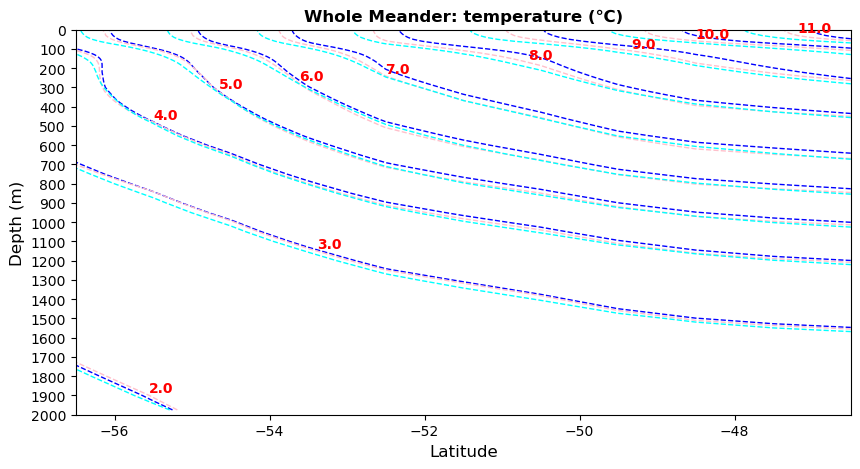

In [48]:
# Now we only plot the temperature in the whole meander
fig = plt.figure(figsize=(10, 5))

# whole meander
ax1 = fig.add_subplot(1, 1, 1)
ax1.invert_yaxis()
ax1.set_title('Whole Meander: temperature (℃)', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('Latitude', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)

cont_temp_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Set the contour levels you want to display

# Contours in three periods
cont_temp_lin_wh_06_10 = ax1.contour(arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='blue', linewidths=1, linestyles='--')

cont_temp_lin_wh_11_15 = ax1.contour(arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='pink', linewidths=1, linestyles='--')

cont_temp_lin_wh_16_19 = ax1.contour(arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax1
for level, contour in zip(cont_temp_val, cont_temp_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
# Set the y-axis tick positions and labels
temp_tick = np.arange(0, 2001, 100)  # Generate tick positions from 0 to 2000 at intervals of 100
ax1.set_yticks(temp_tick)  # Set the y-axis tick positions
ax1.set_yticklabels(temp_tick)  # Set the y-axis tick labels

# Save the figure
#fig.savefig(f'cp_region_wh_2006_2020_temp_cont_dep_paper.png', dpi=600, bbox_inches='tight')

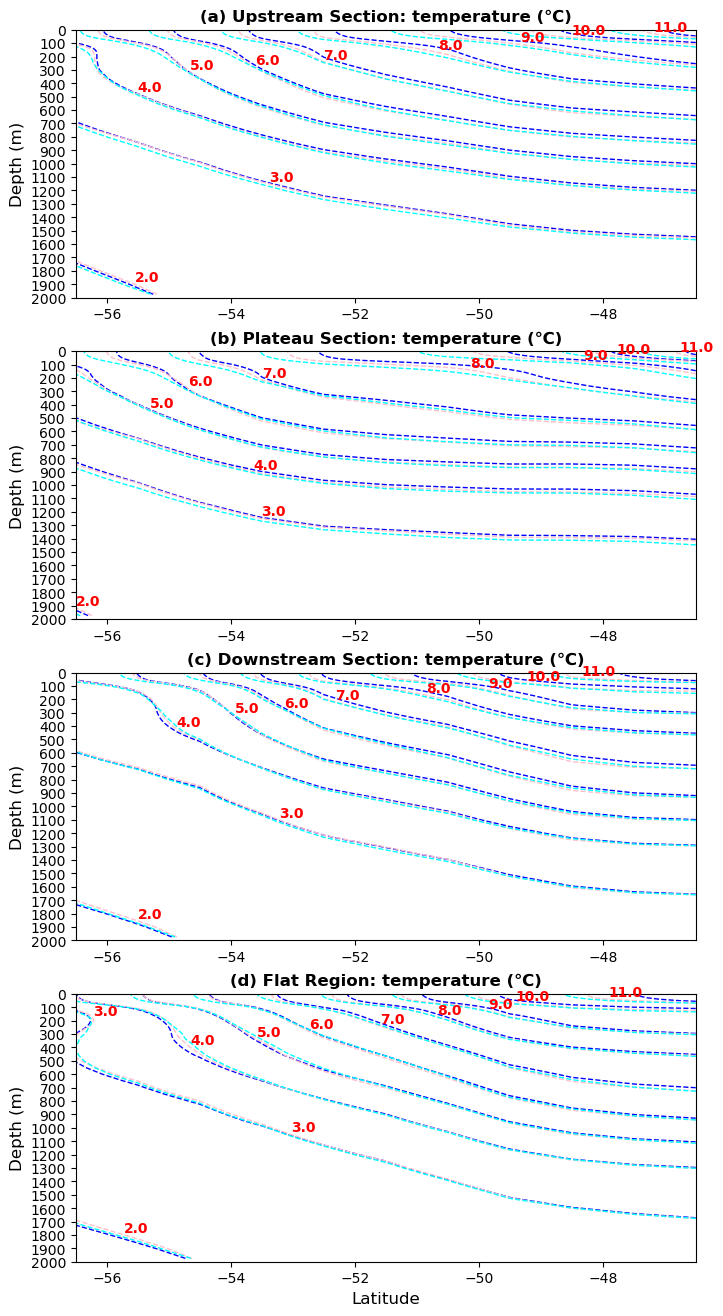

In [50]:
fig = plt.figure(figsize=(8, 16))

# Upstream Section        
ax1 = fig.add_subplot(4, 1, 1)
ax1.invert_yaxis()
ax1.set_title('(a) Upstream Section: temperature (℃)', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_ylabel('Depth (m)', fontsize=12)

# mean contours in three time periods
cont_temp_lin_wh_06_10 = ax1.contour(arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='blue', linewidths=1, linestyles='--')

cont_temp_lin_wh_11_15 = ax1.contour(arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='pink', linewidths=1, linestyles='--')

cont_temp_lin_wh_16_19 = ax1.contour(arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_wh_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_wh_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax2
for level, contour in zip(cont_temp_val, cont_temp_lin_wh_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
ax1.set_yticks(temp_tick)  # Set the y-axis tick positions
ax1.set_yticklabels(temp_tick)  # Set the y-axis tick labels
        
        
# Plateau section
# Plot the annual mean temperature contour movement (plateau section)
ax2 = fig.add_subplot(4, 1, 2)
ax2.invert_yaxis()
ax2.set_title('(b) Plateau Section: temperature (℃)', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_ylabel('Depth (m)', fontsize=12)

# 2006 mean contour
cont_temp_lin_pl_06_10 = ax2.contour(arg_20_temp_pl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='blue', linewidths=1, linestyles='--')

cont_temp_lin_pl_11_15 = ax2.contour(arg_20_temp_pl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='pink', linewidths=1, linestyles='--')

cont_temp_lin_pl_16_19 = ax2.contour(arg_20_temp_pl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_pl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_pl_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax5
for level, contour in zip(cont_temp_val, cont_temp_lin_pl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
ax2.set_yticks(temp_tick)  # Set the y-axis tick positions
ax2.set_yticklabels(temp_tick)  # Set the y-axis tick labels
        
        
# Downstream section
# Plot the annual mean temperature contour movement (downstream section)
ax3 = fig.add_subplot(4, 1, 3)
ax3.invert_yaxis()
ax3.set_title('(c) Downstream Section: temperature (℃)', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_ylabel('Depth (m)', fontsize=12)

# 2006 mean contour
cont_temp_lin_dw_06_10 = ax3.contour(arg_20_temp_dw_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='blue', linewidths=1, linestyles='--')

cont_temp_lin_dw_11_15 = ax3.contour(arg_20_temp_dw_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='pink', linewidths=1, linestyles='--')

cont_temp_lin_dw_16_19 = ax3.contour(arg_20_temp_dw_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_dw_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_dw_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax7
for level, contour in zip(cont_temp_val, cont_temp_lin_dw_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax3.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
ax3.set_yticks(temp_tick)  # Set the y-axis tick positions
ax3.set_yticklabels(temp_tick)  # Set the y-axis tick labels
        
        
# Flat region
# Plot the annual mean temperature contour movement (flat region)
ax4 = fig.add_subplot(4, 1, 4)
ax4.invert_yaxis()
ax4.set_title('(d) Flat Region: temperature (℃)', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('Latitude', fontsize=12)
ax4.set_ylabel('Depth (m)', fontsize=12)

# 2006 mean contour
cont_temp_lin_fl_06_10 = ax4.contour(arg_20_temp_fl_lon_lat_06_10_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_06_10_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_06_10_avg_lon_tim.values, levels=cont_temp_val, colors='blue', linewidths=1, linestyles='--')

cont_temp_lin_fl_11_15 = ax4.contour(arg_20_temp_fl_lon_lat_11_15_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_11_15_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_11_15_avg_lon_tim.values, levels=cont_temp_val, colors='pink', linewidths=1, linestyles='--')

cont_temp_lin_fl_16_19 = ax4.contour(arg_20_temp_fl_lon_lat_16_19_avg_lon_tim['LATITUDE'].values, arg_20_temp_fl_lon_lat_16_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_fl_lon_lat_16_19_avg_lon_tim.values, levels=cont_temp_val, colors='cyan', linewidths=1, linestyles='--')


# Annotate the contour values for ax9
for level, contour in zip(cont_temp_val, cont_temp_lin_fl_11_15.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax4.text(x, y, f'{level:.1f}', color='red', fontweight='bold', fontsize=10, ha='left', va='bottom')
        
ax4.set_yticks(temp_tick)  # Set the y-axis tick positions
ax4.set_yticklabels(temp_tick)  # Set the y-axis tick labels
        
# Save the figure
fig.savefig(f'cp_region_four_secs_2006_2020_temp_cont_dep_paper.png', dpi=600, bbox_inches='tight')

In [51]:
# Check every point in the depth-latitude structure of the salinity and temperature to do their linear regression

# First, check the structure of the variable to see how to adapt for the spatial distribution of the temporal trends of salinity and temperature

# Average the different temperature and salinity over their longitude ranges

# Temperature
arg_20_temp_wh_lon_lat_06_19_avg_lon = arg_20_temp_wh_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_up_lon_lat_06_19_avg_lon = arg_20_temp_up_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_pl_lon_lat_06_19_avg_lon = arg_20_temp_pl_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_dw_lon_lat_06_19_avg_lon = arg_20_temp_dw_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_fl_lon_lat_06_19_avg_lon = arg_20_temp_fl_lon_lat_06_19.mean(dim=['LONGITUDE'])

# Salinity
arg_20_sal_wh_lon_lat_06_19_avg_lon = arg_20_sal_wh_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_up_lon_lat_06_19_avg_lon = arg_20_sal_up_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_pl_lon_lat_06_19_avg_lon = arg_20_sal_pl_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_dw_lon_lat_06_19_avg_lon = arg_20_sal_dw_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_fl_lon_lat_06_19_avg_lon = arg_20_sal_fl_lon_lat_06_19.mean(dim=['LONGITUDE'])

In [52]:
# Check the structure of the variable
arg_20_temp_wh_lon_lat_06_19_avg_lon

<xarray.DataArray 'TEMPERATURE' (TIME: 168, PRESSURE: 58, LATITUDE: 11)>
array([[[ 6.1782513,  6.9034   ,  7.685533 , ..., 11.836577 ,
         12.498551 , 13.128928 ],
        [ 6.1677   ,  6.8942003,  7.6757336, ..., 11.821322 ,
         12.478982 , 13.104161 ],
        [ 6.12975  ,  6.8678164,  7.655584 , ..., 11.767577 ,
         12.417792 , 13.02725  ],
        ...,
        [ 1.9360166,  2.0805333,  2.20885  , ...,  2.6062374,
          2.6340172,  2.6479106],
        [ 1.8717332,  2.0198832,  2.1515832, ...,  2.513051 ,
          2.5374484,  2.548982 ],
        [ 1.8204333,  1.9633166,  2.1024833, ...,  2.4487965,
          2.4695513,  2.477768 ]],

       [[ 6.5241504,  7.3570333,  8.157233 , ..., 12.174543 ,
         12.987638 , 13.9816065],
        [ 6.5217   ,  7.353467 ,  8.152183 , ..., 12.1496105,
         12.943053 , 13.934375 ],
        [ 6.5072665,  7.3402505,  8.139016 , ..., 12.089339 ,
         12.854846 , 13.828412 ],
...
        [ 1.9596999,  2.1001997,  2.2249   , ...,  2.6316442,
          2.6546555,  2.674857 ],
        [ 1.8867999,  2.0293837,  2.15765  , ...,  2.5302033,
          2.5503275,  2.567143 ],
        [ 1.8432165,  1.9734834,  2.10525  , ...,  2.4629493,
          2.4851549,  2.4976425]],

       [[ 6.118883 ,  6.9203663,  7.7402334, ..., 11.732814 ,
         12.350983 , 13.187945 ],
        [ 6.0958004,  6.8974504,  7.7115   , ..., 11.632865 ,
         12.243139 , 13.043661 ],
        [ 5.9834995,  6.795833 ,  7.6118493, ..., 11.413186 ,
         12.010328 , 12.732001 ],
        ...,
        [ 1.9829334,  2.1227   ,  2.237167 , ...,  2.6135423,
          2.644776 ,  2.6709466],
        [ 1.8998998,  2.0399   ,  2.162183 , ...,  2.5112205,
          2.54     ,  2.5624466],
        [ 1.8528   ,  1.9889666,  2.1186833, ...,  2.4536097,
          2.4755518,  2.4918752]]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) datetime64[ns] 2006-01-15 2006-02-15 ... 2019-12-15

In [53]:
# Set up a blank variable that represents the intended EKE temporal trend in each point of the CP region
fill_value = np.nan

# temperature for different sections of the CP region
arg_20_temp_wh_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_temp_wh_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_temp_wh_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_temp_up_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_temp_up_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_temp_up_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_temp_pl_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_temp_pl_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_temp_pl_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_temp_dw_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_temp_dw_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_temp_dw_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_temp_fl_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_temp_fl_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_temp_fl_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)


# salinity for different sections of the cp region
arg_20_sal_wh_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_sal_wh_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_sal_wh_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_sal_up_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_sal_up_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_sal_up_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_sal_pl_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_sal_pl_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_sal_pl_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_sal_dw_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_sal_dw_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_sal_dw_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

arg_20_sal_fl_lon_lat_06_19_avg_lon_tre = np.full((len(arg_20_sal_fl_lon_lat_06_19_avg_lon.PRESSURE),\
                                         len(arg_20_sal_fl_lon_lat_06_19_avg_lon.LATITUDE)), fill_value)

In [54]:
# Remove the nan values for the time: linear regression loop below

# temperature
arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan = arg_20_temp_wh_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_temp_wh_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan = arg_20_temp_up_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_temp_up_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan = arg_20_temp_pl_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_temp_pl_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan = arg_20_temp_dw_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_temp_dw_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan = arg_20_temp_fl_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_temp_fl_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

# salinity
arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan = arg_20_sal_wh_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_sal_wh_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan = arg_20_sal_up_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_sal_up_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan = arg_20_sal_pl_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_sal_pl_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan = arg_20_sal_dw_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_sal_dw_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan = arg_20_sal_fl_lon_lat_06_19_avg_lon.where(~np.isnan(arg_20_sal_fl_lon_lat_06_19_avg_lon),\
                                                                                         drop=True)

In [55]:
# Check the structure of the nan-removed variables above
arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan

<xarray.DataArray 'TEMPERATURE' (TIME: 168, PRESSURE: 58, LATITUDE: 11)>
array([[[ 6.1782513,  6.9034   ,  7.685533 , ..., 11.836577 ,
         12.498551 , 13.128928 ],
        [ 6.1677   ,  6.8942003,  7.6757336, ..., 11.821322 ,
         12.478982 , 13.104161 ],
        [ 6.12975  ,  6.8678164,  7.655584 , ..., 11.767577 ,
         12.417792 , 13.02725  ],
        ...,
        [ 1.9360166,  2.0805333,  2.20885  , ...,  2.6062374,
          2.6340172,  2.6479106],
        [ 1.8717332,  2.0198832,  2.1515832, ...,  2.513051 ,
          2.5374484,  2.548982 ],
        [ 1.8204333,  1.9633166,  2.1024833, ...,  2.4487965,
          2.4695513,  2.477768 ]],

       [[ 6.5241504,  7.3570333,  8.157233 , ..., 12.174543 ,
         12.987638 , 13.9816065],
        [ 6.5217   ,  7.353467 ,  8.152183 , ..., 12.1496105,
         12.943053 , 13.934375 ],
        [ 6.5072665,  7.3402505,  8.139016 , ..., 12.089339 ,
         12.854846 , 13.828412 ],
...
        [ 1.9596999,  2.1001997,  2.2249   , ...,  2.6316442,
          2.6546555,  2.674857 ],
        [ 1.8867999,  2.0293837,  2.15765  , ...,  2.5302033,
          2.5503275,  2.567143 ],
        [ 1.8432165,  1.9734834,  2.10525  , ...,  2.4629493,
          2.4851549,  2.4976425]],

       [[ 6.118883 ,  6.9203663,  7.7402334, ..., 11.732814 ,
         12.350983 , 13.187945 ],
        [ 6.0958004,  6.8974504,  7.7115   , ..., 11.632865 ,
         12.243139 , 13.043661 ],
        [ 5.9834995,  6.795833 ,  7.6118493, ..., 11.413186 ,
         12.010328 , 12.732001 ],
        ...,
        [ 1.9829334,  2.1227   ,  2.237167 , ...,  2.6135423,
          2.644776 ,  2.6709466],
        [ 1.8998998,  2.0399   ,  2.162183 , ...,  2.5112205,
          2.54     ,  2.5624466],
        [ 1.8528   ,  1.9889666,  2.1186833, ...,  2.4536097,
          2.4755518,  2.4918752]]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) datetime64[ns] 2006-01-15 2006-02-15 ... 2019-12-15

In [56]:
# Use the foor loops to calcuate the temporal trends for the salinity and temperature for each point in the CP region

for idx_pre in range(0, len(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        # whole meander region: temperature
        reg_arg_20_temp_wh_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_wh_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_wh_lon_lat_06_19_avg_lon_tre.slope

In [57]:
# Transform this variable to its xrray.DataArray type

# Create the DataArray
arg_20_temp_wh_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_wh_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# You can also assign a name to the variable if needed
#eke_1993_2020_mon_mean_tre.name = "eke_trend"

# Print the resulting DataArray
arg_20_temp_wh_lon_lat_06_19_avg_lon_tre

<xarray.DataArray (PRESSURE: 58, LATITUDE: 11)>
array([[0.02307652, 0.02275765, 0.02427142, 0.02813834, 0.03304853,
        0.03962717, 0.04165354, 0.04176018, 0.04111265, 0.04162204,
        0.04376251],
       [0.02285499, 0.02259559, 0.02415336, 0.02796009, 0.03282175,
        0.0393735 , 0.04140744, 0.04137254, 0.04061117, 0.04109281,
        0.04291209],
       [0.02248899, 0.02230379, 0.02379523, 0.02752447, 0.03261501,
        0.03883735, 0.04062979, 0.04074602, 0.03974679, 0.0398308 ,
        0.04134211],
       [0.02191026, 0.02192762, 0.02347373, 0.02685369, 0.03186206,
        0.03799012, 0.03963715, 0.03976152, 0.03832307, 0.03851487,
        0.03997379],
       [0.02151682, 0.02130887, 0.02278754, 0.02604955, 0.03066561,
        0.03660325, 0.03819272, 0.03823434, 0.03665165, 0.03704107,
        0.03857458],
       [0.02059974, 0.01992019, 0.02111105, 0.02439794, 0.02904059,
        0.03500028, 0.0362399 , 0.03625639, 0.03456381, 0.03456286,
        0.03571413],
       [0.01987322, 0.018627  , 0.01949687, 0.02288686, 0.02788144,
        0.0336663 , 0.03408717, 0.03391189, 0.03243696, 0.03265454,
...
        0.00488434, 0.00504464, 0.00456574, 0.00457127, 0.00526375,
        0.00571991],
       [0.00167497, 0.00179366, 0.00172604, 0.00205272, 0.00287952,
        0.00403613, 0.00426726, 0.00389953, 0.00380011, 0.00432832,
        0.00467121],
       [0.00142032, 0.00145623, 0.00137191, 0.00160519, 0.00234539,
        0.00328665, 0.00347429, 0.0031961 , 0.00300036, 0.00340998,
        0.00362529],
       [0.00110993, 0.00106964, 0.00097406, 0.00122014, 0.00193218,
        0.00272767, 0.00284189, 0.00262499, 0.00245852, 0.00269824,
        0.00283517],
       [0.00116143, 0.00110437, 0.00090046, 0.00106001, 0.00164082,
        0.00235033, 0.00243623, 0.00225009, 0.00210501, 0.00219233,
        0.00225977],
       [0.00107106, 0.00109208, 0.00076413, 0.00077523, 0.00128449,
        0.00183448, 0.00189173, 0.00181253, 0.00166379, 0.00171249,
        0.00178666],
       [0.00050062, 0.00020633, 0.00030384, 0.0006225 , 0.00101406,
        0.00142234, 0.00156697, 0.00158165, 0.00149716, 0.00146387,
        0.0014899 ]])
Coordinates:
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5

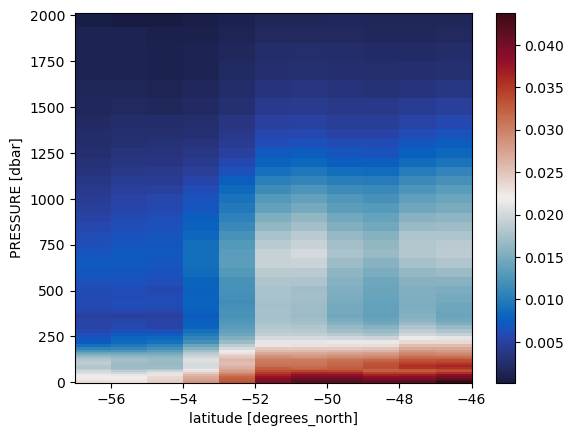

In [58]:
# Plot this newly derived variable
arg_20_temp_wh_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance')

In [59]:
# Next, we apply the same algorithms for the whole meander temperature to other four sections and the salinity

# Temperature:

# whole meander
for idx_pre in range(0, len(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_temp_wh_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_wh_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_wh_lon_lat_06_19_avg_lon_tre.slope

# upstream section
for idx_pre in range(0, len(arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_temp_up_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_up_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_up_lon_lat_06_19_avg_lon_tre.slope
        

# plateau section
for idx_pre in range(0, len(arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_temp_pl_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_pl_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_pl_lon_lat_06_19_avg_lon_tre.slope
        

# downstream section
for idx_pre in range(0, len(arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_temp_dw_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_dw_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_dw_lon_lat_06_19_avg_lon_tre.slope
        

# Flat region
for idx_pre in range(0, len(arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_temp_fl_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_temp_fl_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_temp_fl_lon_lat_06_19_avg_lon_tre.slope

In [60]:
# Salinity:

# whole meander
for idx_pre in range(0, len(arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_sal_wh_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_sal_wh_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_sal_wh_lon_lat_06_19_avg_lon_tre.slope

# upstream section
for idx_pre in range(0, len(arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_sal_up_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_sal_up_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_sal_up_lon_lat_06_19_avg_lon_tre.slope
        

# plateau section
for idx_pre in range(0, len(arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_sal_pl_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_sal_pl_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_sal_pl_lon_lat_06_19_avg_lon_tre.slope
        

# downstream section
for idx_pre in range(0, len(arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_sal_dw_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_sal_dw_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_sal_dw_lon_lat_06_19_avg_lon_tre.slope
        

# Flat region
for idx_pre in range(0, len(arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan.PRESSURE)):
    
    for idx_lat in range(0, len(arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan.LATITUDE)):
        
        arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan_poi = arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan[:, idx_pre, idx_lat]
        
        # Do the linear regeression over each point
        
        reg_arg_20_sal_fl_lon_lat_06_19_avg_lon_tre =\
        linregress(arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan.TIME.astype('float64'),\
                   arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan_poi)
        
        arg_20_sal_fl_lon_lat_06_19_avg_lon_tre[idx_pre, idx_lat] = reg_arg_20_sal_fl_lon_lat_06_19_avg_lon_tre.slope

In [61]:
# Transform all the variables above to the xarray.dataarry format

# temperature:

# whole meander
arg_20_temp_wh_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_wh_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# upstream section
arg_20_temp_up_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_up_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_up_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# plateau section
arg_20_temp_pl_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_pl_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_pl_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# downstream section
arg_20_temp_dw_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_dw_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_dw_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# flat region
arg_20_temp_fl_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_temp_fl_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_temp_fl_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

In [62]:
# salinity:

# whole meander
arg_20_sal_wh_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_sal_wh_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_sal_wh_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# upstream section
arg_20_sal_up_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_sal_up_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_sal_up_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# plateau section
arg_20_sal_pl_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_sal_pl_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_sal_pl_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# downstream section
arg_20_sal_dw_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_sal_dw_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_sal_dw_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

# flat region
arg_20_sal_fl_lon_lat_06_19_avg_lon_tre = xr.DataArray(
    arg_20_sal_fl_lon_lat_06_19_avg_lon_tre*3.1536e+16, # Transform this trend variable to degress celcius per year
    dims=("PRESSURE", "LATITUDE"),
    coords={"PRESSURE": arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan.PRESSURE, "LATITUDE": arg_20_sal_fl_lon_lat_06_19_avg_lon_no_nan.LATITUDE},
)

Text(0, 0.5, '')

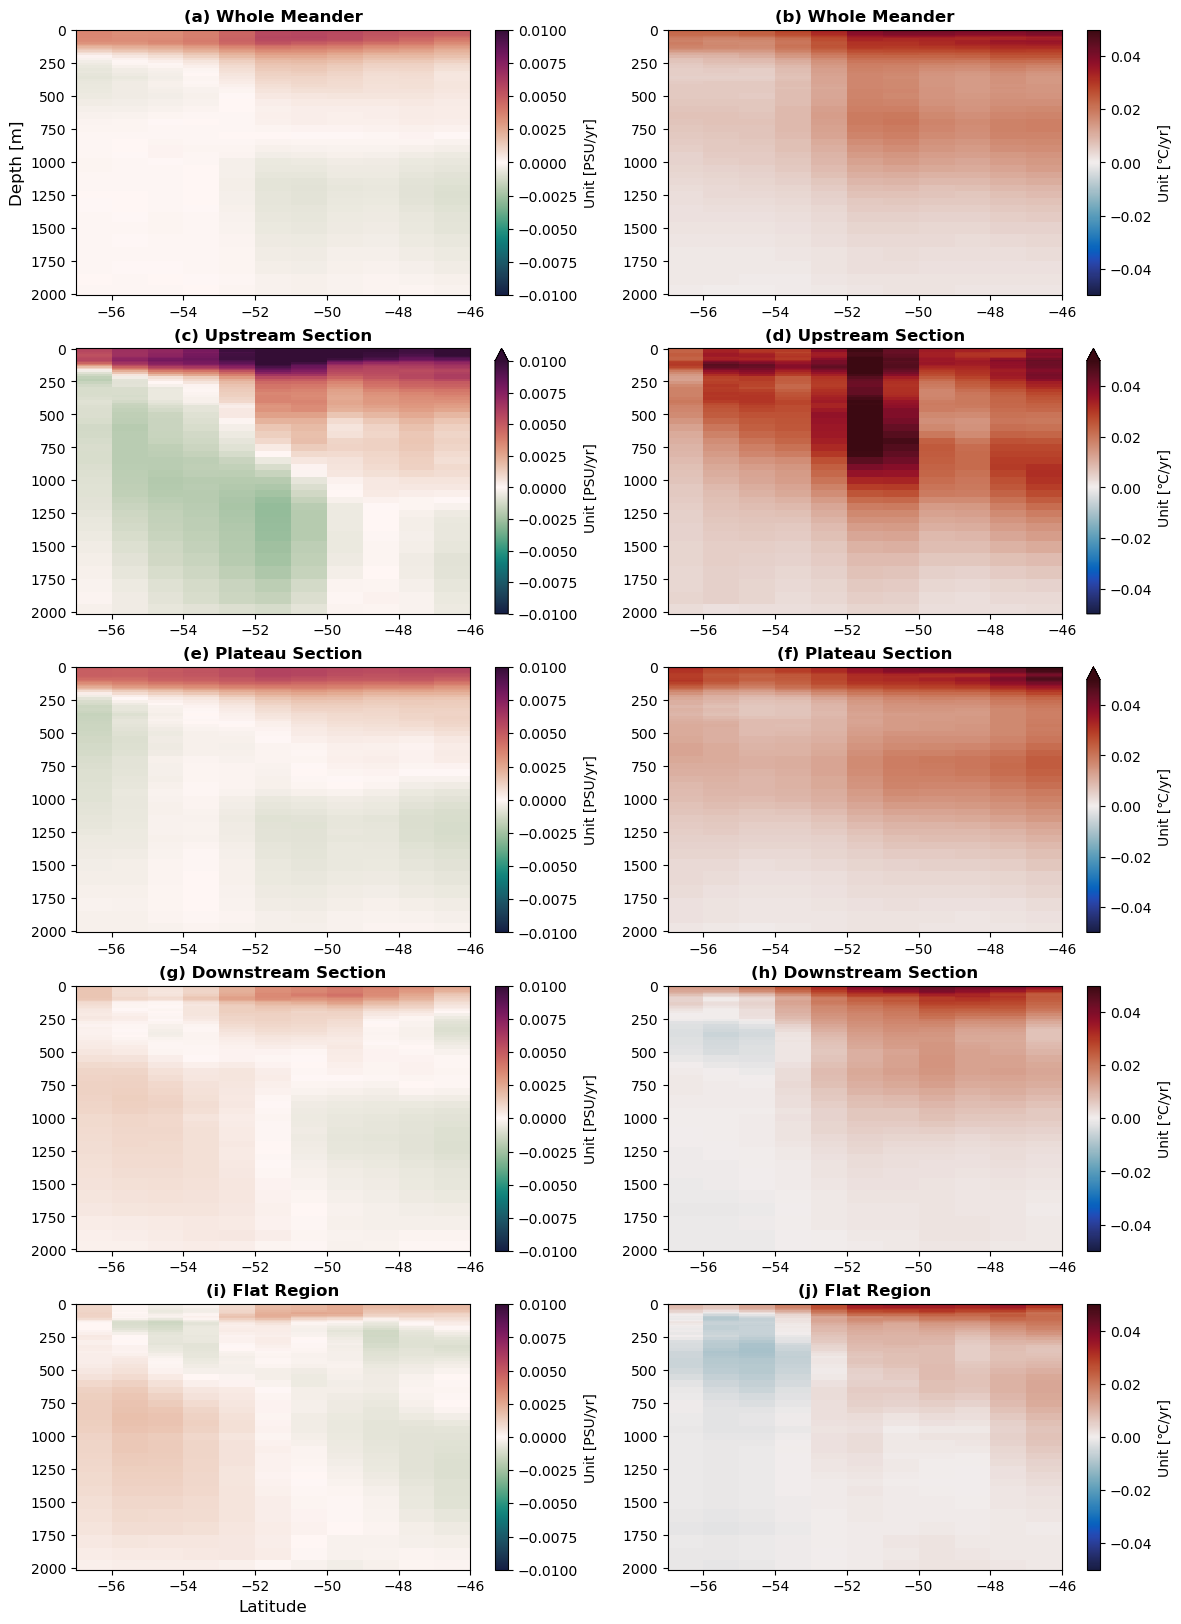

In [63]:
# Next, we plot the depth-latitude structure map of the salinity and temperature in different sections of the Campbell Plateau region

fig = plt.figure(figsize=(14, 20))

# whole meander: salinity trend
ax1 = fig.add_subplot(5, 2, 1)
arg_sal_plot_wh = arg_20_sal_wh_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.curl', ax=ax1, add_colorbar=True, cbar_kwargs={'label': r'Unit [PSU/yr]'}, vmin=-0.01, vmax=0.01)
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth [m]', fontsize=12)


# whole meander: temperature trend
ax2 = fig.add_subplot(5, 2, 2)
arg_temp_plot_wh = arg_20_temp_wh_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax2, add_colorbar=True, cbar_kwargs={'label': r'Unit [℃/yr]'}, vmin=-0.05, vmax=0.05)
ax2.invert_yaxis()
ax2.set_title('(b) Whole Meander', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')
ax2.set_ylabel('')



# Upstream Section: salinity trend
ax3 = fig.add_subplot(5, 2, 3)
arg_sal_plot_up = arg_20_sal_up_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.curl', ax=ax3, add_colorbar=True, cbar_kwargs={'label': r'Unit [PSU/yr]'}, vmin=-0.01, vmax=0.01)
ax3.invert_yaxis()
ax3.set_title('(c) Upstream Section', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')
ax3.set_ylabel('')


# Upstream Section: temperature trend
ax4 = fig.add_subplot(5, 2, 4)
arg_temp_plot_up = arg_20_temp_up_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax4, add_colorbar=True, cbar_kwargs={'label': r'Unit [℃/yr]'}, vmin=-0.05, vmax=0.05)
ax4.invert_yaxis()
ax4.set_title('(d) Upstream Section', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')
ax4.set_ylabel('')



# Plateau Section: salinity trend
ax5 = fig.add_subplot(5, 2, 5)
arg_sal_plot_pl = arg_20_sal_pl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.curl', ax=ax5, add_colorbar=True, cbar_kwargs={'label': r'Unit [PSU/yr]'}, vmin=-0.01, vmax=0.01)
ax5.invert_yaxis()
ax5.set_title('(e) Plateau Section', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')
ax5.set_ylabel('')


# Plateau Section: temperature trend
ax6 = fig.add_subplot(5, 2, 6)
arg_temp_plot_pl = arg_20_temp_pl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax6, add_colorbar=True, cbar_kwargs={'label': r'Unit [℃/yr]'}, vmin=-0.05, vmax=0.05)
ax6.invert_yaxis()
ax6.set_title('(f) Plateau Section', fontweight='bold')
ax6.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax6.set_xlabel('')
ax6.set_ylabel('')



# Downstream Section: salinity trend
ax7 = fig.add_subplot(5, 2, 7)
arg_sal_plot_dw = arg_20_sal_dw_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.curl', ax=ax7, add_colorbar=True, cbar_kwargs={'label': r'Unit [PSU/yr]'}, vmin=-0.01, vmax=0.01)
ax7.invert_yaxis()
ax7.set_title('(g) Downstream Section', fontweight='bold')
ax7.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax7.set_xlabel('')
ax7.set_ylabel('')


# Downstream Section: temperature trend
ax8 = fig.add_subplot(5, 2, 8)
arg_temp_plot_dw = arg_20_temp_dw_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax8, add_colorbar=True, cbar_kwargs={'label': r'Unit [℃/yr]'}, vmin=-0.05, vmax=0.05)
ax8.invert_yaxis()
ax8.set_title('(h) Downstream Section', fontweight='bold')
ax8.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax8.set_xlabel('')
ax8.set_ylabel('')



# Flat Region: salinity trend
ax9 = fig.add_subplot(5, 2, 9)
arg_sal_plot_fl = arg_20_sal_fl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.curl', ax=ax9, add_colorbar=True, cbar_kwargs={'label': r'Unit [PSU/yr]'}, vmin=-0.01, vmax=0.01)
ax9.invert_yaxis()
ax9.set_title('(i) Flat Region', fontweight='bold')
ax9.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax9.set_xlabel('Latitude', fontsize=12)
ax9.set_ylabel('')


# Flat Region: temperature trend
ax10 = fig.add_subplot(5, 2, 10)
arg_temp_plot_fl = arg_20_temp_fl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax10, add_colorbar=True, cbar_kwargs={'label': r'Unit [℃/yr]'}, vmin=-0.05, vmax=0.05)
ax10.invert_yaxis()
ax10.set_title('(j) Flat Region', fontweight='bold')
ax10.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax10.set_xlabel('')
ax10.set_ylabel('')


# Save the figure
#fig.savefig(f'cp_region_2006_2020_dep_lat_sal_temp_tre.png', dpi=600, bbox_inches='tight')

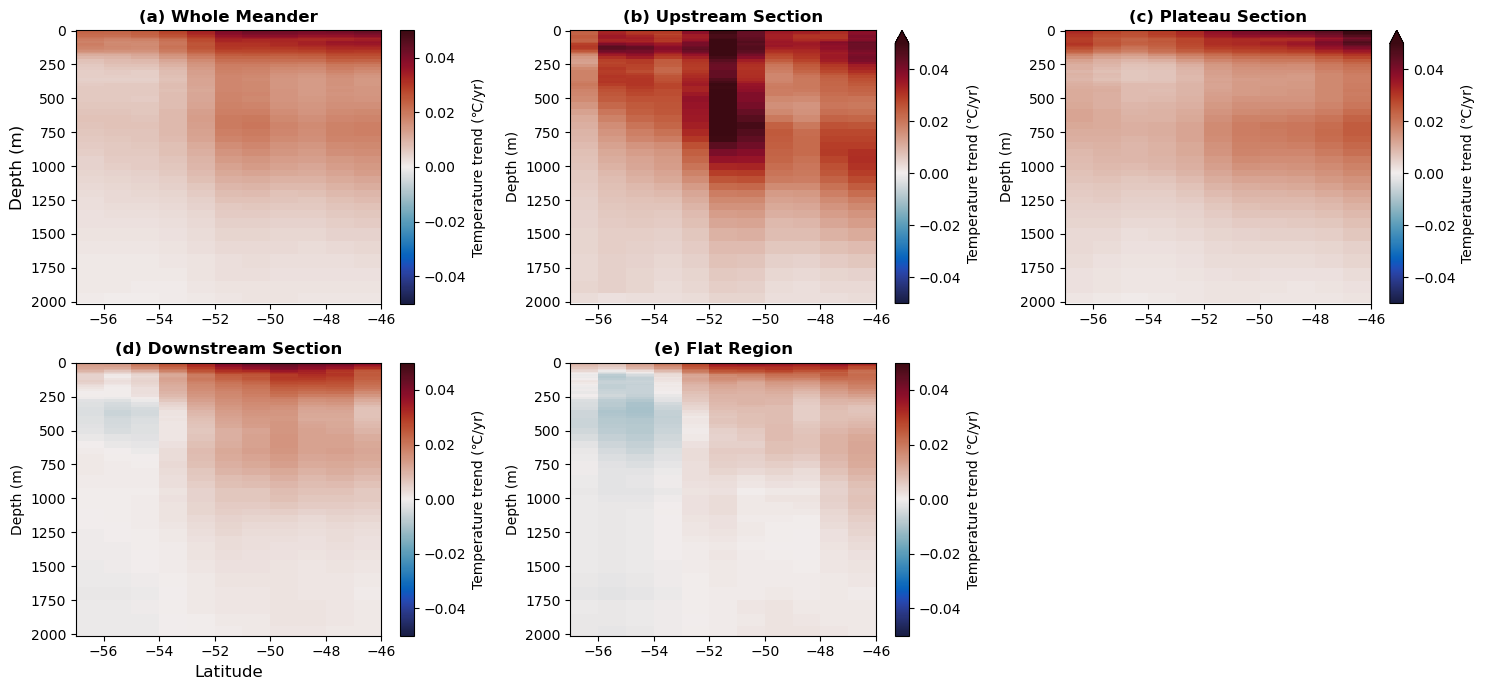

In [75]:
# Next, we only want to plot the depth-latitude structure map of the temperature
# in different sections of the Campbell Plateau region

fig = plt.figure(figsize=(15, 7))

# whole meander: temperature trend
ax1 = fig.add_subplot(2, 3, 1)
arg_temp_plot_wh = arg_20_temp_wh_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax1, add_colorbar=True, cbar_kwargs={'label': r'Temperature trend (℃/yr)'}, vmin=-0.05, vmax=0.05)
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth (m)', fontsize=12)


# Upstream Section: temperature trend
ax2 = fig.add_subplot(2, 3, 2)
arg_temp_plot_up = arg_20_temp_up_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax2, add_colorbar=True, cbar_kwargs={'label': r'Temperature trend (℃/yr)'}, vmin=-0.05, vmax=0.05)
ax2.invert_yaxis()
ax2.set_title('(b) Upstream Section', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')
ax2.set_ylabel('Depth (m)')


# Plateau Section: temperature trend
ax3 = fig.add_subplot(2, 3, 3)
arg_temp_plot_pl = arg_20_temp_pl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax3, add_colorbar=True, cbar_kwargs={'label': r'Temperature trend (℃/yr)'}, vmin=-0.05, vmax=0.05)
ax3.invert_yaxis()
ax3.set_title('(c) Plateau Section', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')
ax3.set_ylabel('Depth (m)')


# Downstream Section: temperature trend
ax4 = fig.add_subplot(2, 3, 4)
arg_temp_plot_dw = arg_20_temp_dw_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax4, add_colorbar=True, cbar_kwargs={'label': r'Temperature trend (℃/yr)'}, vmin=-0.05, vmax=0.05)
ax4.invert_yaxis()
ax4.set_title('(d) Downstream Section', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('Latitude', fontsize=12)
ax4.set_ylabel('Depth (m)')


# Flat Region: temperature trend
ax5 = fig.add_subplot(2, 3, 5)
arg_temp_plot_fl = arg_20_temp_fl_lon_lat_06_19_avg_lon_tre.plot(cmap='cmo.balance', ax=ax5, add_colorbar=True, cbar_kwargs={'label': r'Temperature trend (℃/yr)'}, vmin=-0.05, vmax=0.05)
ax5.invert_yaxis()
ax5.set_title('(e) Flat Region', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')
ax5.set_ylabel('Depth (m)')

# Adjust the layout
plt.tight_layout()

# Save the figure
fig.savefig(f'cp_region_2006_2020_dep_lat_temp_tre.png', dpi=600, bbox_inches='tight')

In [41]:
# Now we move to the time series of the temperature and salinity contours movement

# Then sort this variable according to several salinity contours
# [34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8]

# Firstly, check the variable structure for further modification
arg_20_sal_wh_lon_lat_06_19 # We need to average the salinity and temperature over the pressure and longitude dimensions

<xarray.DataArray 'SALINITY' (TIME: 48, PRESSURE: 58, LATITUDE: 11, LONGITUDE: 60)>
array([[[[33.902   , 33.901   , 33.887997, ..., 33.858997, 33.864   ,
          33.864   ],
         [33.938   , 33.934   , 33.901   , ..., 33.830997, 33.825   ,
          33.828   ],
         [34.016   , 33.968998, 33.92    , ..., 33.882   , 33.851   ,
          33.876   ],
         ...,
         [34.619   , 34.544   , 34.61    , ..., 34.512   , 34.517   ,
          34.526997],
         [34.758   , 34.733997, 34.725   , ..., 34.493   , 34.518997,
          34.543   ],
         [35.044   , 34.908   , 34.852   , ..., 34.491   , 34.496   ,
          34.505   ]],

        [[33.902   , 33.901   , 33.889   , ..., 33.858997, 33.864   ,
          33.864   ],
         [33.938   , 33.934   , 33.902   , ..., 33.830997, 33.825   ,
          33.828   ],
         [34.016   , 33.969997, 33.920998, ..., 33.883   , 33.853   ,
          33.877   ],
...
         [34.634003, 34.638   , 34.639   , ..., 34.581   , 34.586   ,
          34.59    ],
         [34.621002, 34.615997, 34.621998, ..., 34.577   , 34.579998,
          34.583   ],
         [34.607998, 34.599   , 34.606   , ..., 34.584   , 34.587   ,
          34.587   ]],

        [[34.716   , 34.718   , 34.719997, ..., 34.732   , 34.732   ,
          34.732   ],
         [34.718002, 34.723   , 34.723   , ..., 34.729   , 34.731   ,
          34.733   ],
         [34.716   , 34.722   , 34.722   , ..., 34.722   , 34.722   ,
          34.723   ],
         ...,
         [34.649998, 34.654   , 34.656998, ..., 34.603   , 34.608   ,
          34.61    ],
         [34.638   , 34.638   , 34.644   , ..., 34.598   , 34.601   ,
          34.602   ],
         [34.626   , 34.619   , 34.628   , ..., 34.602   , 34.605   ,
          34.607   ]]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 150.5 151.5 152.5 153.5 ... 207.5 208.5 209.5
  * LATITUDE   (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2016-01-15 2016-02-15 ... 2019-12-15

In [45]:
# Average the salinity and temperature zonally over their longitude dimension

# Salinity
arg_20_sal_wh_lon_lat_06_19_avg_lon = arg_20_sal_wh_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_up_lon_lat_06_19_avg_lon = arg_20_sal_up_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_pl_lon_lat_06_19_avg_lon = arg_20_sal_pl_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_dw_lon_lat_06_19_avg_lon = arg_20_sal_dw_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_sal_fl_lon_lat_06_19_avg_lon = arg_20_sal_fl_lon_lat_06_19.mean(dim=['LONGITUDE'])

# Temperature
arg_20_temp_wh_lon_lat_06_19_avg_lon = arg_20_temp_wh_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_up_lon_lat_06_19_avg_lon = arg_20_temp_up_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_pl_lon_lat_06_19_avg_lon = arg_20_temp_pl_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_dw_lon_lat_06_19_avg_lon = arg_20_temp_dw_lon_lat_06_19.mean(dim=['LONGITUDE'])
arg_20_temp_fl_lon_lat_06_19_avg_lon = arg_20_temp_fl_lon_lat_06_19.mean(dim=['LONGITUDE'])

In [43]:
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_wh_lon_lat_06_19_avg_pre_lon.round(1)

In [44]:
# Check the rounded variable below
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1

<xarray.DataArray 'SALINITY' (TIME: 48, LATITUDE: 11)>
array([[34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
...
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.6],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.6],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.6],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.6],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5, 34.5],
       [34.3, 34.3, 34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 34.5, 34.5]],
      dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -56.5 -55.5 -54.5 -53.5 ... -48.5 -47.5 -46.5
  * TIME      (TIME) datetime64[ns] 2016-01-15 2016-02-15 ... 2019-12-15

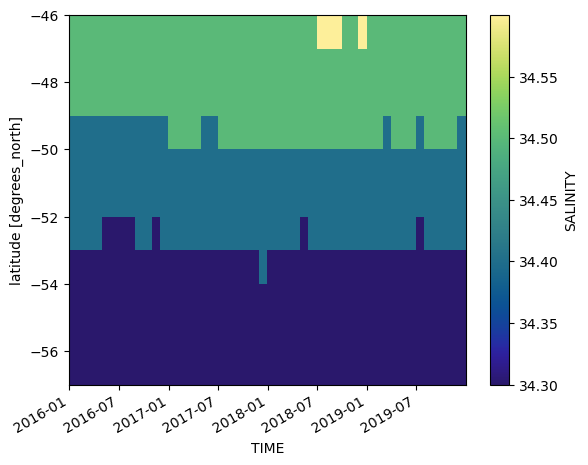

In [45]:
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline')

In [46]:
# Round the salinity and temperature variables to the first decimal point

# salinity
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_wh_lon_lat_06_19_avg_pre_lon.round(1)
arg_20_sal_up_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_up_lon_lat_06_19_avg_pre_lon.round(1)
arg_20_sal_pl_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_pl_lon_lat_06_19_avg_pre_lon.round(1)
arg_20_sal_dw_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_dw_lon_lat_06_19_avg_pre_lon.round(1)
arg_20_sal_fl_lon_lat_06_19_avg_pre_lon_rnd_1 = arg_20_sal_fl_lon_lat_06_19_avg_pre_lon.round(1)

# temperature
arg_20_temp_wh_lon_lat_06_19_avg_pre_lon_rnd_0 = arg_20_temp_wh_lon_lat_06_19_avg_pre_lon.round(0)
arg_20_temp_up_lon_lat_06_19_avg_pre_lon_rnd_0 = arg_20_temp_up_lon_lat_06_19_avg_pre_lon.round(0)
arg_20_temp_pl_lon_lat_06_19_avg_pre_lon_rnd_0 = arg_20_temp_pl_lon_lat_06_19_avg_pre_lon.round(0)
arg_20_temp_dw_lon_lat_06_19_avg_pre_lon_rnd_0 = arg_20_temp_dw_lon_lat_06_19_avg_pre_lon.round(0)
arg_20_temp_fl_lon_lat_06_19_avg_pre_lon_rnd_0 = arg_20_temp_fl_lon_lat_06_19_avg_pre_lon.round(0)

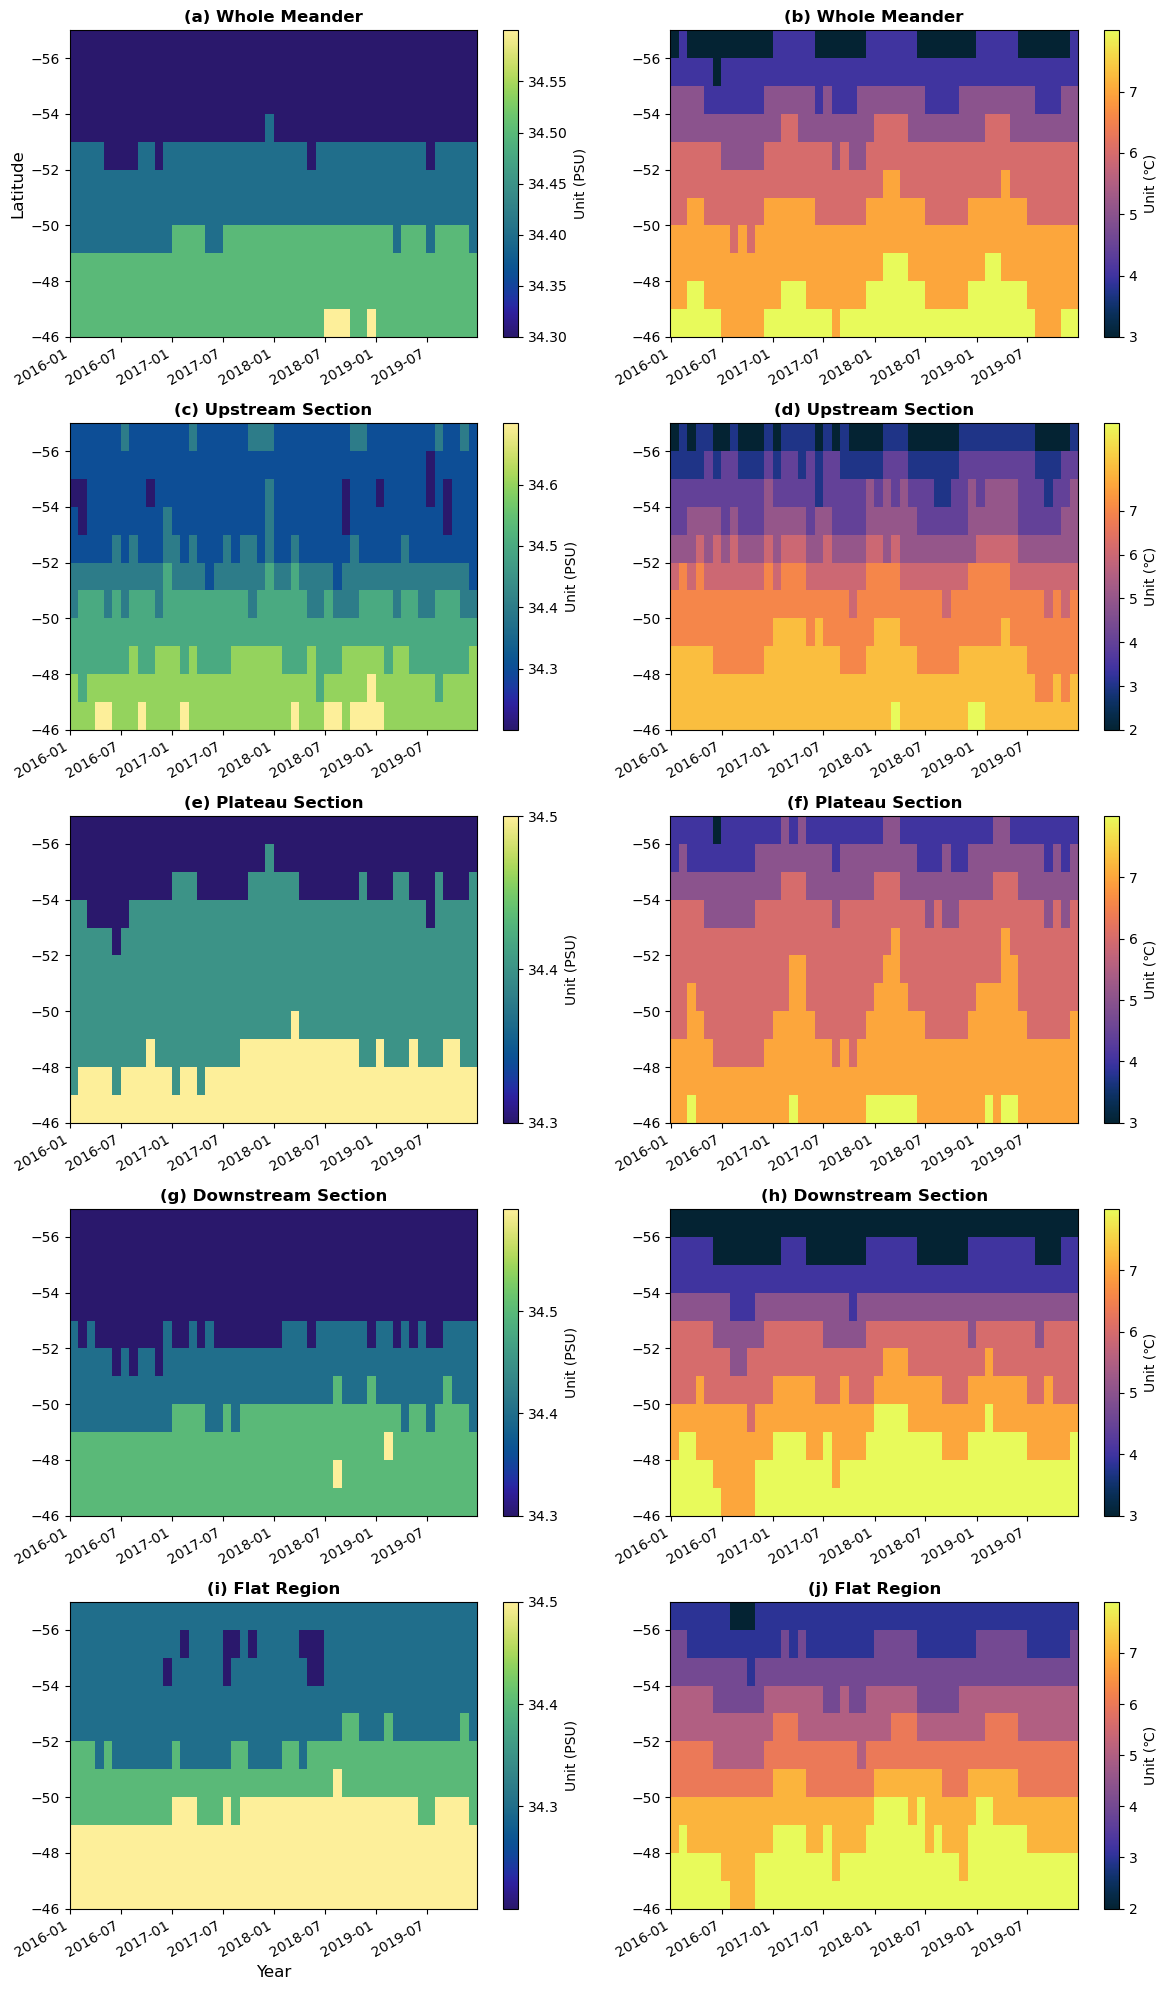

In [47]:
# Plot the time-latitude structure map of the salinity and temperature above

fig = plt.figure(figsize=(12, 20))

# whole meander: salinity
ax1 = fig.add_subplot(5, 2, 1)
arg_sal_plot_wh = arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax1, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.05)})
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Latitude', fontsize=12)

# whole meander: temperature
ax2 = fig.add_subplot(5, 2, 2)
arg_temp_plot_wh = arg_20_temp_wh_lon_lat_06_19_avg_pre_lon_rnd_0.plot(x='TIME', y='LATITUDE', cmap='cmo.thermal', ax=ax2, add_colorbar=True, cbar_kwargs={'label': r'Unit (℃)', 'ticks': np.arange(2, 8, 1)})
ax2.invert_yaxis()
ax2.set_title('(b) Whole Meander', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')
ax2.set_ylabel('')


# upstream section: salinity
ax3 = fig.add_subplot(5, 2, 3)
arg_sal_plot_up = arg_20_sal_up_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax3, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.1)})
ax3.invert_yaxis()
ax3.set_title('(c) Upstream Section', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')
ax3.set_ylabel('')

# upstream section: temperature
ax4 = fig.add_subplot(5, 2, 4)
arg_temp_plot_up = arg_20_temp_up_lon_lat_06_19_avg_pre_lon_rnd_0.plot(x='TIME', y='LATITUDE', cmap='cmo.thermal', ax=ax4, add_colorbar=True, cbar_kwargs={'label': r'Unit (℃)', 'ticks': np.arange(2, 8, 1)})
ax4.invert_yaxis()
ax4.set_title('(d) Upstream Section', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')
ax4.set_ylabel('')


# Plateau section: salinity
ax5 = fig.add_subplot(5, 2, 5)
arg_sal_plot_pl = arg_20_sal_pl_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax5, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.1)})
ax5.invert_yaxis()
ax5.set_title('(e) Plateau Section', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')
ax5.set_ylabel('')

# Plateau section: temperature
ax6 = fig.add_subplot(5, 2, 6)
arg_temp_plot_pl = arg_20_temp_pl_lon_lat_06_19_avg_pre_lon_rnd_0.plot(x='TIME', y='LATITUDE', cmap='cmo.thermal', ax=ax6, add_colorbar=True, cbar_kwargs={'label': r'Unit (℃)', 'ticks': np.arange(2, 8, 1)})
ax6.invert_yaxis()
ax6.set_title('(f) Plateau Section', fontweight='bold')
ax6.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax6.set_xlabel('')
ax6.set_ylabel('')


# Downstream section: salinity
ax7 = fig.add_subplot(5, 2, 7)
arg_sal_plot_dw = arg_20_sal_dw_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax7, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.1)})
ax7.invert_yaxis()
ax7.set_title('(g) Downstream Section', fontweight='bold')
ax7.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax7.set_xlabel('')
ax7.set_ylabel('')

# Downstream section: temperature
ax8 = fig.add_subplot(5, 2, 8)
arg_temp_plot_dw = arg_20_temp_dw_lon_lat_06_19_avg_pre_lon_rnd_0.plot(x='TIME', y='LATITUDE', cmap='cmo.thermal', ax=ax8, add_colorbar=True, cbar_kwargs={'label': r'Unit (℃)', 'ticks': np.arange(2, 8, 1)})
ax8.invert_yaxis()
ax8.set_title('(h) Downstream Section', fontweight='bold')
ax8.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax8.set_xlabel('')
ax8.set_ylabel('')


# Flat Region: salinity
ax9 = fig.add_subplot(5, 2, 9)
arg_sal_plot_fl = arg_20_sal_fl_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax9, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.1)})
ax9.invert_yaxis()
ax9.set_title('(i) Flat Region', fontweight='bold')
ax9.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax9.set_xlabel('Year', fontsize=12)
ax9.set_ylabel('')

# Flat Region: temperature
ax10 = fig.add_subplot(5, 2, 10)
arg_temp_plot_fl = arg_20_temp_fl_lon_lat_06_19_avg_pre_lon_rnd_0.plot(x='TIME', y='LATITUDE', cmap='cmo.thermal', ax=ax10, add_colorbar=True, cbar_kwargs={'label': r'Unit (℃)', 'ticks': np.arange(2, 8, 1)})
ax10.invert_yaxis()
ax10.set_title('(j) Flat Region', fontweight='bold')
ax10.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax10.set_xlabel('')
ax10.set_ylabel('')

# Adjust the layout
plt.tight_layout()

#plt.subplots_adjust(vspace=0.2)  # Increase the vertical spacing between subplots

# Save the figure
fig.savefig(f'CP_region_2006_2020_lat_time_sal_temp.png', dpi=600, bbox_inches='tight')

In [114]:
# Specify the contours of each salinity value for the linear regression below

# whole meander: salinity
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344 =\
arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1.where(arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1 == 34.4, drop=True)

# Estimate the linear trend and its statistical significance
# Perform linear regression
slope_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344, intercept_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344,\
r_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344, p_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344,\
std_err_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344\
= linregress(arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344.TIME.astype('float64'),\
             arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344)

# Calculate regression line
reg_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344 =\
slope_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344 * arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344.TIME.astype('float64')\
+ intercept_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344

# Calculate R-squared value
r_squ_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344 = r_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344 ** 2

ax1.plot(arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344.TIME, reg_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344_str = '{:.3f}'.format(slope_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344*3.1536e+16)
p_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344_str = 'p={:.2f}'.format(p_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344)
r_squ_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 48 and the array at index 1 has size 5

In [110]:
reg_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344

<xarray.DataArray 'TIME' (TIME: 48)>
array([34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771, 34.39999771, 34.39999771,
       34.39999771, 34.39999771, 34.39999771])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2016-01-15 2016-02-15 ... 2019-12-15

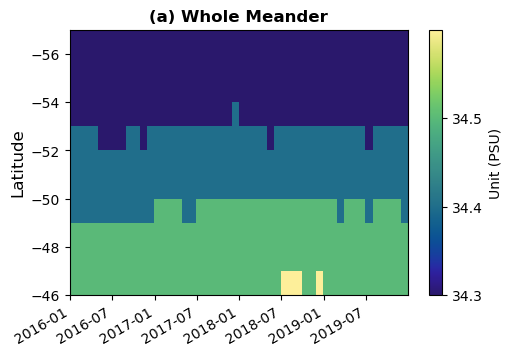

In [111]:
fig = plt.figure(figsize=(12, 20))

# whole meander: salinity
ax1 = fig.add_subplot(5, 2, 1)
arg_sal_plot_wh = arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1.plot(x='TIME', y='LATITUDE', cmap='cmo.haline', ax=ax1, add_colorbar=True, cbar_kwargs={'label': r'Unit (PSU)', 'ticks': np.arange(34.3, 34.6, 0.1)})
ax1.invert_yaxis()
ax1.set_title('(a) Whole Meander', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Latitude', fontsize=12)

ax1.plot(arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344.TIME, reg_arg_20_sal_wh_lon_lat_06_19_avg_pre_lon_rnd_1_344, c='red', linestyle='--')

In [76]:
# Now we want to check the salinity and temperature anomalies
#arg_20_temp_mon_anm

arg_20_sal_mon_anm

<xarray.DataArray 'SALINITY_MONTHLY_ANOMALIES' (TIME: 192, PRESSURE: 58, LATITUDE: 145, LONGITUDE: 360)>
[581299200 values with dtype=float32]
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2004-01-15 2004-02-15 ... 2019-12-15

In [78]:
# Specify the temperature and salinity anomalies within the 2006-2019 period and in the CP region and four sections

# Whole meander

# Salinity
arg_20_sal_mon_anm_wh_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_wh[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# Temperature
arg_20_temp_mon_anm_wh_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_wh[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_wh[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)


# Upstream section
# Salinity
arg_20_sal_mon_anm_up_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_up[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# Temperature
arg_20_temp_mon_anm_up_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_up[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_up[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)


# Plateau section
# Salinity
arg_20_sal_mon_anm_pl_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_pl[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# Temperature
arg_20_temp_mon_anm_pl_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_pl[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_pl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)


# downstream section
# Salinity
arg_20_sal_mon_anm_dw_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_dw[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# Temperature
arg_20_temp_mon_anm_dw_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_dw[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_dw[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)


# Flat region
# Salinity
arg_20_sal_mon_anm_fl_lon_lat_06_19 = arg_20_sal_mon_anm.where(
    np.logical_and(
        (arg_20_sal_mon_anm.LONGITUDE >= lon_fl[0]),
        (arg_20_sal_mon_anm.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_sal_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_sal_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_sal_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

# Temperature
arg_20_temp_mon_anm_fl_lon_lat_06_19 = arg_20_temp_mon_anm.where(
    np.logical_and(
        (arg_20_temp_mon_anm.LONGITUDE >= lon_fl[0]),
        (arg_20_temp_mon_anm.LONGITUDE <= lon_fl[1])
    ) & # longitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.LATITUDE >= lat_cp[0]),
        (arg_20_temp_mon_anm.LATITUDE <= lat_cp[1])
    ) & # latitude
    
    np.logical_and(
        (arg_20_temp_mon_anm.TIME >= np.datetime64('2006-01-01T00:00:00.000000000')),
        (arg_20_temp_mon_anm.TIME <= np.datetime64('2020-05-31T00:00:00.000000000'))
    ), # time
    
    drop=True
)

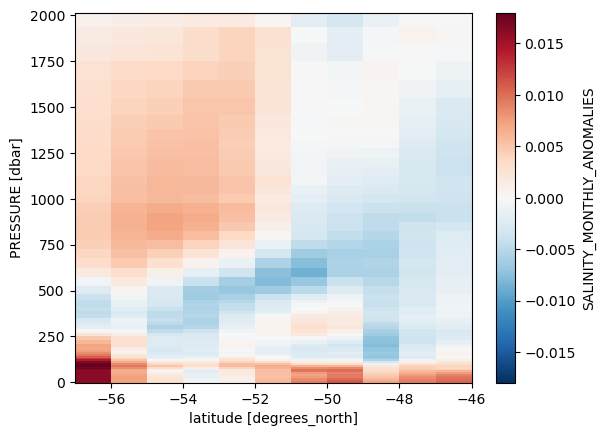

In [82]:
# Check and test plot the derived variable above
arg_20_sal_mon_anm_fl_lon_lat_06_19.mean(dim=['TIME', 'LONGITUDE']).plot()

In [81]:
# Average the 2006-2020 depth-latitude structure of the
# temperature and salinity anomalies in the whole CP region and other four sections

# salinity
arg_20_sal_mon_anm_wh_lon_lat_06_19_avg_lon_tim = arg_20_sal_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_mon_anm_up_lon_lat_06_19_avg_lon_tim = arg_20_sal_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_mon_anm_pl_lon_lat_06_19_avg_lon_tim = arg_20_sal_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_mon_anm_dw_lon_lat_06_19_avg_lon_tim = arg_20_sal_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_sal_mon_anm_fl_lon_lat_06_19_avg_lon_tim = arg_20_sal_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])

# temperature
arg_20_temp_mon_anm_wh_lon_lat_06_19_avg_lon_tim = arg_20_temp_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_mon_anm_up_lon_lat_06_19_avg_lon_tim = arg_20_temp_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_mon_anm_pl_lon_lat_06_19_avg_lon_tim = arg_20_temp_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_mon_anm_dw_lon_lat_06_19_avg_lon_tim = arg_20_temp_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])
arg_20_temp_mon_anm_fl_lon_lat_06_19_avg_lon_tim = arg_20_temp_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'TIME'])

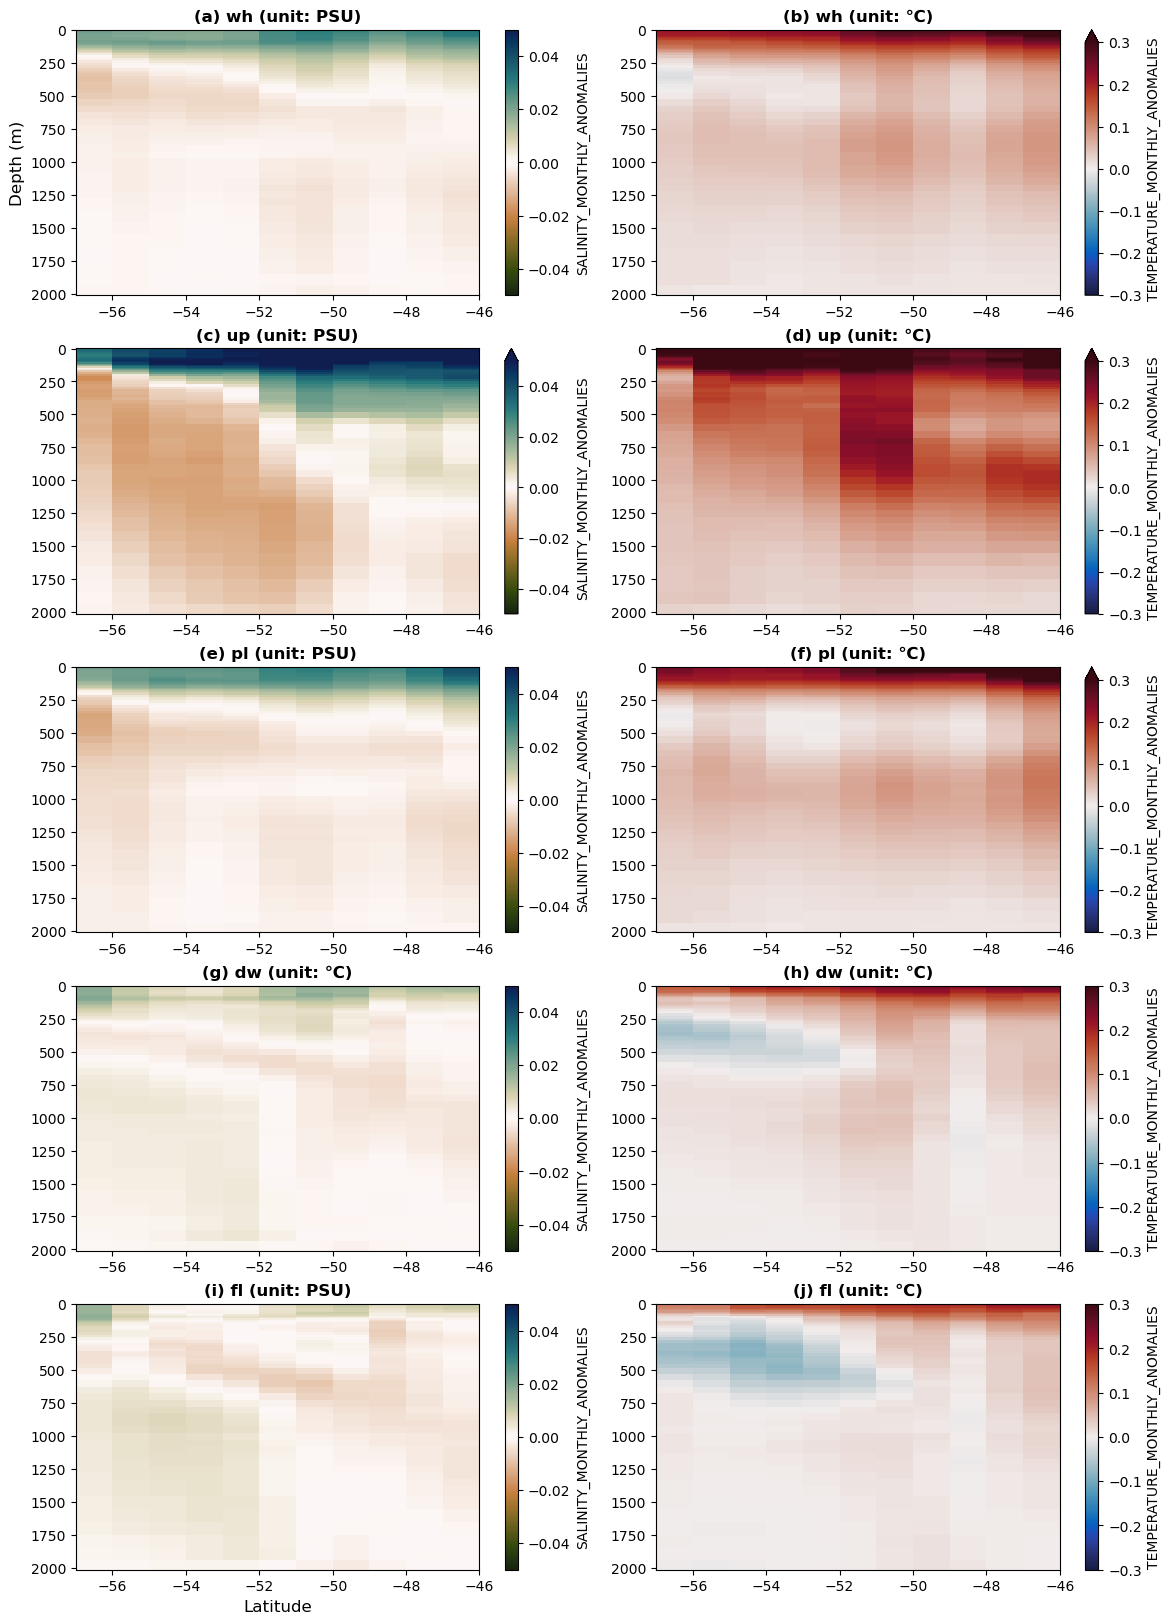

In [100]:
# Plot the 2006-2020 mean depth-latitude structure of the average
# temperature and salinity in the whole CP region and other four sections

fig = plt.figure(figsize=(14, 20))

# Plotting the mean 2006-2019 salinity (whole CP region)
ax1 = fig.add_subplot(5, 2, 1)
arg_sal_anm_plot_wh = arg_20_sal_mon_anm_wh_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.tarn', ax=ax1, vmin=-0.05, vmax=0.05)
ax1.invert_yaxis()
ax1.set_title('(a) wh (unit: PSU)', fontweight='bold')
ax1.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax1.set_xlabel('')
ax1.set_ylabel('Depth (m)', fontsize=12)

'''cont_sal_anm_val = [-0.05, -0.04, -0.03, -0.02, -0.01, 0.00, 0.01, 0.02, 0.03, 0.04, 0.05]  # Set the contour levels you want to display
cont_sal_anm_lin_wh = ax1.contour(arg_20_sal_mon_anm_wh_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                  arg_20_sal_mon_anm_wh_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_mon_anm_wh_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_anm_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_anm_val, cont_sal_anm_lin_wh.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.2f}', color='black', fontsize=10, ha='center', va='center')'''


# Plotting the mean 2006-2019 temperature (whole CP region)
ax2 = fig.add_subplot(5, 2, 2)
arg_temp_anm_plot_wh = arg_20_temp_mon_anm_wh_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.balance', ax=ax2, vmin=-0.3, vmax=0.3)
ax2.invert_yaxis()
ax2.set_title('(b) wh (unit: ℃)', fontweight='bold')
ax2.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax2.set_xlabel('')
ax2.set_ylabel('')

'''cont_temp_anm_val = [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]  # Set the contour levels you want to display
cont_temp_anm_lin_wh = ax2.contour(arg_20_temp_mon_anm_wh_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                   arg_20_temp_mon_anm_wh_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_mon_anm_wh_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_anm_val, colors='black', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_anm_val, cont_temp_anm_lin_wh.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.2f}', color='white', fontsize=10, ha='center', va='center')'''


# Upstream section
# Plotting the mean 2006-2019 salinity (upstream section)
ax3 = fig.add_subplot(5, 2, 3)
arg_sal_anm_plot_up = arg_20_sal_mon_anm_up_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.tarn', ax=ax3, vmin=-0.05, vmax=0.05)
ax3.invert_yaxis()
ax3.set_title('(c) up (unit: PSU)', fontweight='bold')
ax3.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax3.set_xlabel('')
ax3.set_ylabel('')

'''cont_sal_anm_lin_up = ax3.contour(arg_20_sal_mon_anm_up_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                  arg_20_sal_mon_anm_up_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_mon_anm_up_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_anm_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_anm_val, cont_sal_anm_lin_up.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.2f}', color='black', fontsize=10, ha='center', va='center')'''

        
# Plotting the mean 2006-2019 temperature (upstream section)
ax4 = fig.add_subplot(5, 2, 4)
arg_temp_anm_plot_up = arg_20_temp_mon_anm_up_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.balance', ax=ax4, vmin=-0.3, vmax=0.3)
ax4.invert_yaxis()
ax4.set_title('(d) up (unit: ℃)', fontweight='bold')
ax4.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax4.set_xlabel('')
ax4.set_ylabel('')

'''cont_temp_anm_lin_up = ax4.contour(arg_20_temp_mon_anm_up_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                   arg_20_temp_mon_anm_up_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_mon_anm_up_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_anm_val, colors='black', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_anm_val, cont_temp_anm_lin_up.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.2f}', color='white', fontsize=10, ha='center', va='center')'''


# Plateau section
# Plotting the mean 2006-2019 salinity (plateau section)
ax5 = fig.add_subplot(5, 2, 5)
arg_sal_anm_plot_pl = arg_20_sal_mon_anm_pl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.tarn', ax=ax5, vmin=-0.05, vmax=0.05)
ax5.invert_yaxis()
ax5.set_title('(e) pl (unit: PSU)', fontweight='bold')
ax5.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax5.set_xlabel('')
ax5.set_ylabel('')

'''cont_sal_anm_lin_pl = ax5.contour(arg_20_sal_mon_anm_pl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                  arg_20_sal_mon_anm_pl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_mon_anm_pl_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_anm_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_anm_val, cont_sal_anm_lin_pl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.2f}', color='black', fontsize=10, ha='center', va='center')'''


# Plotting the mean 2006-2019 temperature (plateau section)
ax6 = fig.add_subplot(5, 2, 6)
arg_temp_anm_plot_pl = arg_20_temp_mon_anm_pl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.balance', ax=ax6, vmin=-0.3, vmax=0.3)
ax6.invert_yaxis()
ax6.set_title('(f) pl (unit: ℃)', fontweight='bold')
ax6.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax6.set_xlabel('')
ax6.set_ylabel('')

'''cont_temp_anm_lin_pl = ax6.contour(arg_20_temp_mon_anm_pl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                   arg_20_temp_mon_anm_pl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_mon_anm_pl_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_anm_val, colors='black', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_anm_val, cont_temp_anm_lin_pl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.2f}', color='white', fontsize=10, ha='center', va='center')'''


# Downstream section
# Plotting the mean 2006-2019 salinity (downstream section)
ax7 = fig.add_subplot(5, 2, 7)
arg_sal_anm_plot_dw = arg_20_sal_mon_anm_dw_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.tarn', ax=ax7, vmin=-0.05, vmax=0.05)
ax7.invert_yaxis()
ax7.set_title('(g) dw (unit: ℃)', fontweight='bold')
ax7.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax7.set_xlabel('')
ax7.set_ylabel('')

'''cont_sal_anm_lin_dw = ax7.contour(arg_20_sal_mon_anm_dw_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                  arg_20_sal_mon_anm_dw_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_mon_anm_dw_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_anm_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_anm_val, cont_sal_anm_lin_dw.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.2f}', color='black', fontsize=10, ha='center', va='center')'''


# Plotting the mean 2006-2019 temperature (downstream section)
ax8 = fig.add_subplot(5, 2, 8)
arg_temp_anm_plot_dw = arg_20_temp_mon_anm_dw_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.balance', ax=ax8, vmin=-0.3, vmax=0.3)
ax8.invert_yaxis()
ax8.set_title('(h) dw (unit: ℃)', fontweight='bold')
ax8.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax8.set_xlabel('')
ax8.set_ylabel('')

'''cont_temp_anm_lin_dw = ax4.contour(arg_20_temp_mon_anm_dw_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                   arg_20_temp_mon_anm_dw_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_mon_anm_dw_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_anm_val, colors='black', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_anm_val, cont_temp_anm_lin_dw.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.2f}', color='white', fontsize=10, ha='center', va='center')'''
        
        
# Flat region
# Plotting the mean 2006-2019 salinity (downstream section)
ax9 = fig.add_subplot(5, 2, 9)
arg_sal_anm_plot_fl = arg_20_sal_mon_anm_fl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.tarn', ax=ax9, vmin=-0.05, vmax=0.05)
ax9.invert_yaxis()
ax9.set_title('(i) fl (unit: PSU)', fontweight='bold')
ax9.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax9.set_xlabel('Latitude', fontsize=12)
ax9.set_ylabel('')

'''cont_sal_anm_lin_fl = ax9.contour(arg_20_sal_mon_anm_fl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                  arg_20_sal_mon_anm_fl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_sal_mon_anm_fl_lon_lat_06_19_avg_lon_tim.values, levels=cont_sal_anm_val, colors='k', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_sal_anm_val, cont_sal_anm_lin_fl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax1.text(x, y, f'{level:.2f}', color='black', fontsize=10, ha='center', va='center')'''
        

# Plotting the mean 2006-2019 temperature (flat region)
ax10 = fig.add_subplot(5, 2, 10)
arg_temp_anm_plot_fl = arg_20_temp_mon_anm_fl_lon_lat_06_19_avg_lon_tim.plot(cmap='cmo.balance', ax=ax10, vmin=-0.3, vmax=0.3)
ax10.invert_yaxis()
ax10.set_title('(j) fl (unit: ℃)', fontweight='bold')
ax10.set_aspect('auto')  # Adjust the aspect ratio of the subplot
ax10.set_xlabel('')
ax10.set_ylabel('')

'''cont_temp_anm_lin_fl = ax4.contour(arg_20_temp_mon_anm_fl_lon_lat_06_19_avg_lon_tim['LATITUDE'].values,\
                                   arg_20_temp_mon_anm_fl_lon_lat_06_19_avg_lon_tim['PRESSURE'].values,\
            arg_20_temp_mon_anm_fl_lon_lat_06_19_avg_lon_tim.values, levels=cont_temp_anm_val, colors='black', linewidths=1, linestyles='--')

# Annotate the contour values for ax1
for level, contour in zip(cont_temp_anm_val, cont_temp_anm_lin_fl.collections):
    for path in contour.get_paths():
        vertices = path.vertices
        x, y = vertices[len(vertices) // 2]  # Use the middle point of the contour line
        ax2.text(x, y, f'{level:.2f}', color='white', fontsize=10, ha='center', va='center')'''

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.15)

plt.show()

# Save the figure
fig.savefig(f'CP_region_2006_2020_sal_temp_anm_dep_lat.png', dpi=600, bbox_inches='tight')

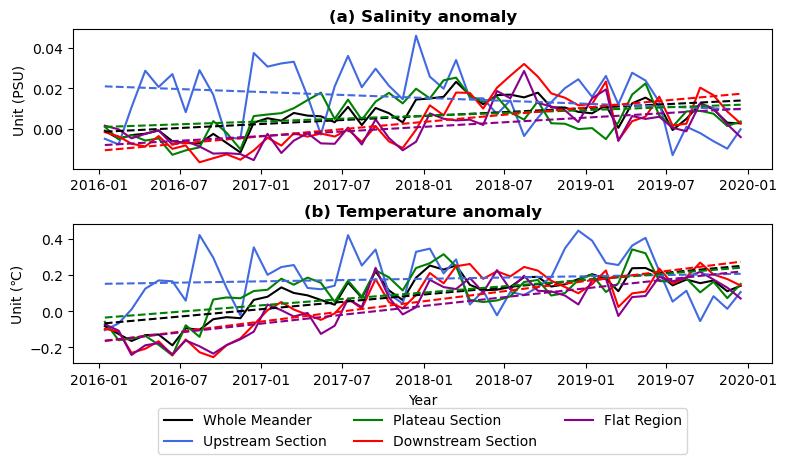

In [104]:
# Time series of the temperature and salinity in the CP region and four sections
fig = plt.figure(figsize=(8, 5))  # Increased the figure size

# Campbell Plateau region

# Salinity time series
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(arg_20_time_06_19, arg_20_sal_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='black', label='Whole Meander')
ax1.plot(arg_20_time_06_19, arg_20_sal_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='royalblue', label='Upstream Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='green', label='Plateau Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='red', label='Downstream Section')
ax1.plot(arg_20_time_06_19, arg_20_sal_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='darkmagenta', label='Flat Region')

# Whole Meander: 
# Perform linear regression
slope_arg_20_sal_mon_anm_wh_lon_lat_06_19, intercept_arg_20_sal_mon_anm_wh_lon_lat_06_19,\
r_arg_20_sal_mon_anm_wh_lon_lat_06_19, p_arg_20_sal_mon_anm_wh_lon_lat_06_19, std_err_arg_20_sal_mon_anm_wh_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_mon_anm_wh_lon_lat_06_19 = slope_arg_20_sal_mon_anm_wh_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_mon_anm_wh_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_mon_anm_wh_lon_lat_06_19 = r_arg_20_sal_mon_anm_wh_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_mon_anm_wh_lon_lat_06_19, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_mon_anm_wh_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_sal_mon_anm_wh_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_mon_anm_wh_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_mon_anm_wh_lon_lat_06_19)
r_squ_arg_20_sal_mon_anm_wh_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_mon_anm_wh_lon_lat_06_19)


# Upstream Section: 
# Perform linear regression
slope_arg_20_sal_mon_anm_up_lon_lat_06_19, intercept_arg_20_sal_mon_anm_up_lon_lat_06_19,\
r_arg_20_sal_mon_anm_up_lon_lat_06_19, p_arg_20_sal_mon_anm_up_lon_lat_06_19, std_err_arg_20_sal_mon_anm_up_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_mon_anm_up_lon_lat_06_19 = slope_arg_20_sal_mon_anm_up_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_mon_anm_up_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_mon_anm_up_lon_lat_06_19 = r_arg_20_sal_mon_anm_up_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_mon_anm_up_lon_lat_06_19, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_mon_anm_up_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_sal_mon_anm_up_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_mon_anm_up_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_mon_anm_up_lon_lat_06_19)
r_squ_arg_20_sal_mon_anm_up_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_mon_anm_up_lon_lat_06_19)


# Plateau Section: 
# Perform linear regression
slope_arg_20_sal_mon_anm_pl_lon_lat_06_19, intercept_arg_20_sal_mon_anm_pl_lon_lat_06_19,\
r_arg_20_sal_mon_anm_pl_lon_lat_06_19, p_arg_20_sal_mon_anm_pl_lon_lat_06_19, std_err_arg_20_sal_mon_anm_pl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_mon_anm_pl_lon_lat_06_19 = slope_arg_20_sal_mon_anm_pl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_mon_anm_pl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_mon_anm_pl_lon_lat_06_19 = r_arg_20_sal_mon_anm_pl_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_mon_anm_pl_lon_lat_06_19, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_mon_anm_pl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_sal_mon_anm_pl_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_mon_anm_pl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_mon_anm_pl_lon_lat_06_19)
r_squ_arg_20_sal_mon_anm_pl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_mon_anm_pl_lon_lat_06_19)


# Downstream Section: 
# Perform linear regression
slope_arg_20_sal_mon_anm_dw_lon_lat_06_19, intercept_arg_20_sal_mon_anm_dw_lon_lat_06_19,\
r_arg_20_sal_mon_anm_dw_lon_lat_06_19, p_arg_20_sal_mon_anm_dw_lon_lat_06_19, std_err_arg_20_sal_mon_anm_dw_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_mon_anm_dw_lon_lat_06_19 = slope_arg_20_sal_mon_anm_dw_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_mon_anm_dw_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_mon_anm_dw_lon_lat_06_19 = r_arg_20_sal_mon_anm_dw_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_mon_anm_dw_lon_lat_06_19, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_mon_anm_dw_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_sal_mon_anm_dw_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_mon_anm_dw_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_mon_anm_dw_lon_lat_06_19)
r_squ_arg_20_sal_mon_anm_dw_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_mon_anm_dw_lon_lat_06_19)


# Flat region: 
# Perform linear regression
slope_arg_20_sal_mon_anm_fl_lon_lat_06_19, intercept_arg_20_sal_mon_anm_fl_lon_lat_06_19,\
r_arg_20_sal_mon_anm_fl_lon_lat_06_19, p_arg_20_sal_mon_anm_fl_lon_lat_06_19, std_err_arg_20_sal_mon_anm_fl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_sal_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_sal_mon_anm_fl_lon_lat_06_19 = slope_arg_20_sal_mon_anm_fl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_sal_mon_anm_fl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_sal_mon_anm_fl_lon_lat_06_19 = r_arg_20_sal_mon_anm_fl_lon_lat_06_19 ** 2

ax1.plot(arg_20_time_06_19, reg_arg_20_sal_mon_anm_fl_lon_lat_06_19, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_sal_mon_anm_fl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_sal_mon_anm_fl_lon_lat_06_19*3.1536e+16)
p_arg_20_sal_mon_anm_fl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_sal_mon_anm_fl_lon_lat_06_19)
r_squ_arg_20_sal_mon_anm_fl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_sal_mon_anm_fl_lon_lat_06_19)

ax1.set_title('(a) Salinity anomaly', fontweight='bold')
ax1.title.set_position([0.5, 0.6])  # Adjust the position of the title within the subplot

# Set x-axis ticks and labels
ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.set_ylabel('Unit (PSU)')
ax1.set_xlabel('')

# Format x-axis as dates
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())



# Temperature time series
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(arg_20_time_06_19, arg_20_temp_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='black', label='Whole Meander')
ax2.plot(arg_20_time_06_19, arg_20_temp_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='royalblue', label='Upstream Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='green', label='Plateau Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='red', label='Downstream Section')
ax2.plot(arg_20_time_06_19, arg_20_temp_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']), c='darkmagenta', label='Flat Region')


# Whole Meander: 
# Perform linear regression
slope_arg_20_temp_mon_anm_wh_lon_lat_06_19, intercept_arg_20_temp_mon_anm_wh_lon_lat_06_19,\
r_arg_20_temp_mon_anm_wh_lon_lat_06_19, p_arg_20_temp_mon_anm_wh_lon_lat_06_19, std_err_arg_20_temp_mon_anm_wh_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_mon_anm_wh_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_mon_anm_wh_lon_lat_06_19 = slope_arg_20_temp_mon_anm_wh_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_mon_anm_wh_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_mon_anm_wh_lon_lat_06_19 = r_arg_20_temp_mon_anm_wh_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_mon_anm_wh_lon_lat_06_19, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_mon_anm_wh_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_mon_anm_wh_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_mon_anm_wh_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_mon_anm_wh_lon_lat_06_19)
r_squ_arg_20_temp_mon_anm_wh_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_mon_anm_wh_lon_lat_06_19)


# Upstream Section: 
# Perform linear regression
slope_arg_20_temp_mon_anm_up_lon_lat_06_19, intercept_arg_20_temp_mon_anm_up_lon_lat_06_19,\
r_arg_20_temp_mon_anm_up_lon_lat_06_19, p_arg_20_temp_mon_anm_up_lon_lat_06_19, std_err_arg_20_temp_mon_anm_up_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_mon_anm_up_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_mon_anm_up_lon_lat_06_19 = slope_arg_20_temp_mon_anm_up_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_mon_anm_up_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_mon_anm_up_lon_lat_06_19 = r_arg_20_temp_mon_anm_up_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_mon_anm_up_lon_lat_06_19, c='royalblue', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_mon_anm_up_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_mon_anm_up_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_mon_anm_up_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_mon_anm_up_lon_lat_06_19)
r_squ_arg_20_temp_mon_anm_up_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_mon_anm_up_lon_lat_06_19)


# Plateau Section: 
# Perform linear regression
slope_arg_20_temp_mon_anm_pl_lon_lat_06_19, intercept_arg_20_temp_mon_anm_pl_lon_lat_06_19,\
r_arg_20_temp_mon_anm_pl_lon_lat_06_19, p_arg_20_temp_mon_anm_pl_lon_lat_06_19, std_err_arg_20_temp_mon_anm_pl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_mon_anm_pl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_mon_anm_pl_lon_lat_06_19 = slope_arg_20_temp_mon_anm_pl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_mon_anm_pl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_mon_anm_pl_lon_lat_06_19 = r_arg_20_temp_mon_anm_pl_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_mon_anm_pl_lon_lat_06_19, c='green', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_mon_anm_pl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_mon_anm_pl_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_mon_anm_pl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_mon_anm_pl_lon_lat_06_19)
r_squ_arg_20_temp_mon_anm_pl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_mon_anm_pl_lon_lat_06_19)


# Downstream Section: 
# Perform linear regression
slope_arg_20_temp_mon_anm_dw_lon_lat_06_19, intercept_arg_20_temp_mon_anm_dw_lon_lat_06_19,\
r_arg_20_temp_mon_anm_dw_lon_lat_06_19, p_arg_20_temp_mon_anm_dw_lon_lat_06_19, std_err_arg_20_temp_mon_anm_dw_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_mon_anm_dw_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_mon_anm_dw_lon_lat_06_19 = slope_arg_20_temp_mon_anm_dw_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_mon_anm_dw_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_mon_anm_dw_lon_lat_06_19 = r_arg_20_temp_mon_anm_dw_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_mon_anm_dw_lon_lat_06_19, c='red', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_mon_anm_dw_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_mon_anm_dw_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_mon_anm_dw_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_mon_anm_dw_lon_lat_06_19)
r_squ_arg_20_temp_mon_anm_dw_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_mon_anm_dw_lon_lat_06_19)


# Flat region: 
# Perform linear regression
slope_arg_20_temp_mon_anm_fl_lon_lat_06_19, intercept_arg_20_temp_mon_anm_fl_lon_lat_06_19,\
r_arg_20_temp_mon_anm_fl_lon_lat_06_19, p_arg_20_temp_mon_anm_fl_lon_lat_06_19, std_err_arg_20_temp_mon_anm_fl_lon_lat_06_19\
= linregress(arg_20_time_06_19.astype('float64'), arg_20_temp_mon_anm_fl_lon_lat_06_19.mean(dim=['LONGITUDE', 'LATITUDE', 'PRESSURE']))

# Calculate regression line
reg_arg_20_temp_mon_anm_fl_lon_lat_06_19 = slope_arg_20_temp_mon_anm_fl_lon_lat_06_19 * arg_20_time_06_19.astype('float64') + intercept_arg_20_temp_mon_anm_fl_lon_lat_06_19

# Calculate R-squared value
r_squ_arg_20_temp_mon_anm_fl_lon_lat_06_19 = r_arg_20_temp_mon_anm_fl_lon_lat_06_19 ** 2

ax2.plot(arg_20_time_06_19, reg_arg_20_temp_mon_anm_fl_lon_lat_06_19, c='darkmagenta', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_arg_20_temp_mon_anm_fl_lon_lat_06_19_str = '{:.2f}'.format(slope_arg_20_temp_mon_anm_fl_lon_lat_06_19*3.1536e+16)
p_arg_20_temp_mon_anm_fl_lon_lat_06_19_str = 'p={:.2f}'.format(p_arg_20_temp_mon_anm_fl_lon_lat_06_19)
r_squ_arg_20_temp_mon_anm_fl_lon_lat_06_19_str = 'R\u00b2={:.2f}'.format(r_squ_arg_20_temp_mon_anm_fl_lon_lat_06_19)

ax2.set_title('(b) Temperature anomaly', fontweight='bold')
ax2.title.set_position([0.5, 0.6])  # Adjust the position of the title within the subplot

ax2.set_ylabel('Unit (℃)')
ax2.set_xlabel('Year')

# Set x-axis ticks and labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(200))

# Format x-axis as dates
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())

# Add a legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=3)

# Adjust the layout
plt.tight_layout()

plt.subplots_adjust(hspace=0.4)  # Increase the vertical spacing between subplots

# Show the plot
plt.show()

# Save the figure
fig.savefig(f'CP_region_2006_2020_sal_temp_anm_time_series.png', dpi=600, bbox_inches='tight')

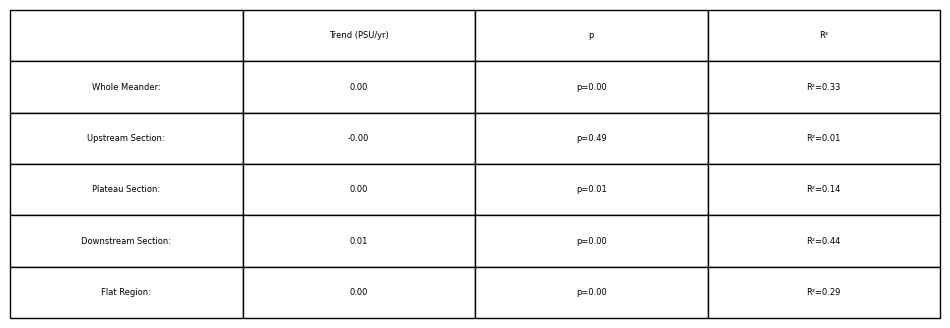

In [109]:
# Table of these salinity anomaly trends and their corresponding statistics

# Define the table data
table_sal_anm_06_19 = [
    ['', 'Trend (PSU/yr)', 'p', 'R\u00b2'],
    ['Whole Meander:', slope_arg_20_sal_mon_anm_wh_lon_lat_06_19_str, p_arg_20_sal_mon_anm_wh_lon_lat_06_19_str, r_squ_arg_20_sal_mon_anm_wh_lon_lat_06_19_str],
    ['Upstream Section:', slope_arg_20_sal_mon_anm_up_lon_lat_06_19_str, p_arg_20_sal_mon_anm_up_lon_lat_06_19_str, r_squ_arg_20_sal_mon_anm_up_lon_lat_06_19_str],
    ['Plateau Section:', slope_arg_20_sal_mon_anm_pl_lon_lat_06_19_str, p_arg_20_sal_mon_anm_pl_lon_lat_06_19_str, r_squ_arg_20_sal_mon_anm_pl_lon_lat_06_19_str],
    ['Downstream Section:', slope_arg_20_sal_mon_anm_dw_lon_lat_06_19_str, p_arg_20_sal_mon_anm_dw_lon_lat_06_19_str, r_squ_arg_20_sal_mon_anm_dw_lon_lat_06_19_str],
    ['Flat Region:', slope_arg_20_sal_mon_anm_fl_lon_lat_06_19_str, p_arg_20_sal_mon_anm_fl_lon_lat_06_19_str, r_squ_arg_20_sal_mon_anm_fl_lon_lat_06_19_str],
]

# Create a separate figure for the table
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes to show only the table
ax.axis('off')

# Table settings
table_x = 0
table_y = 0
table_width = 2.0
table_height = 1.0

# Create the table
table = ax.table(cellText=table_sal_06_19, cellLoc='center', loc='center',
                 bbox=[table_x, table_y, table_width, table_height])

# Set the fontsize for the entire table
font_size = 12
for cell in table.get_celld().values():
    cell.set_fontsize(font_size)

# Show the table
plt.show()

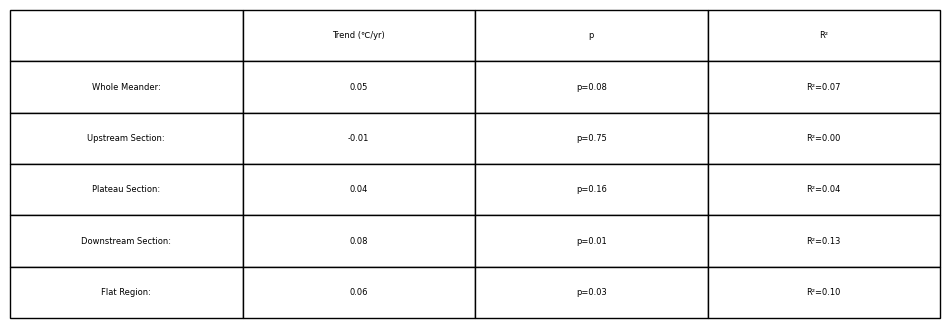

In [110]:
# Table of these temperature anomaly trends and their corresponding statistics

# Define the table data
table_temp_anm_06_19 = [
    ['', 'Trend (PSU/yr)', 'p', 'R\u00b2'],
    ['Whole Meander:', slope_arg_20_temp_mon_anm_wh_lon_lat_06_19_str, p_arg_20_temp_mon_anm_wh_lon_lat_06_19_str, r_squ_arg_20_temp_mon_anm_wh_lon_lat_06_19_str],
    ['Upstream Section:', slope_arg_20_temp_mon_anm_up_lon_lat_06_19_str, p_arg_20_temp_mon_anm_up_lon_lat_06_19_str, r_squ_arg_20_temp_mon_anm_up_lon_lat_06_19_str],
    ['Plateau Section:', slope_arg_20_temp_mon_anm_pl_lon_lat_06_19_str, p_arg_20_temp_mon_anm_pl_lon_lat_06_19_str, r_squ_arg_20_temp_mon_anm_pl_lon_lat_06_19_str],
    ['Downstream Section:', slope_arg_20_temp_mon_anm_dw_lon_lat_06_19_str, p_arg_20_temp_mon_anm_dw_lon_lat_06_19_str, r_squ_arg_20_temp_mon_anm_dw_lon_lat_06_19_str],
    ['Flat Region:', slope_arg_20_temp_mon_anm_fl_lon_lat_06_19_str, p_arg_20_temp_mon_anm_fl_lon_lat_06_19_str, r_squ_arg_20_temp_mon_anm_fl_lon_lat_06_19_str],
]

# Create a separate figure for the table
fig, ax = plt.subplots(figsize=(6, 4))

# Hide axes to show only the table
ax.axis('off')

# Table settings
table_x = 0
table_y = 0
table_width = 2.0
table_height = 1.0

# Create the table
table = ax.table(cellText=table_temp_06_19, cellLoc='center', loc='center',
                 bbox=[table_x, table_y, table_width, table_height])

# Set the fontsize for the entire table
font_size = 12
for cell in table.get_celld().values():
    cell.set_fontsize(font_size)

# Show the table
plt.show()